In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../input/application_train.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Type"]
dtype_df[dtype_df['Type']=='object']

,Count,Type
2,NAME_CONTRACT_TYPE,object
3,CODE_GENDER,object
4,FLAG_OWN_CAR,object
5,FLAG_OWN_REALTY,object
11,NAME_TYPE_SUITE,object
12,NAME_INCOME_TYPE,object
13,NAME_EDUCATION_TYPE,object
14,NAME_FAMILY_STATUS,object
15,NAME_HOUSING_TYPE,object
28,OCCUPATION_TYPE,object


In [4]:
display(dtype_df.groupby("Type").aggregate('count').reset_index()) 

,Type,Count
0,int64,41
1,float64,65
2,object,16


In [5]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
total = 0
for column in data.columns:
    if data[column].dtypes=='O':
        display(data[column].value_counts())
        total +=1
print(total)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

16


In [7]:
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Type"]
dtype_df[dtype_df['Type']=='float']

,Count,Type
7,AMT_INCOME_TOTAL,float64
8,AMT_CREDIT,float64
9,AMT_ANNUITY,float64
10,AMT_GOODS_PRICE,float64
16,REGION_POPULATION_RELATIVE,float64
19,DAYS_REGISTRATION,float64
21,OWN_CAR_AGE,float64
29,CNT_FAM_MEMBERS,float64
41,EXT_SOURCE_1,float64
42,EXT_SOURCE_2,float64


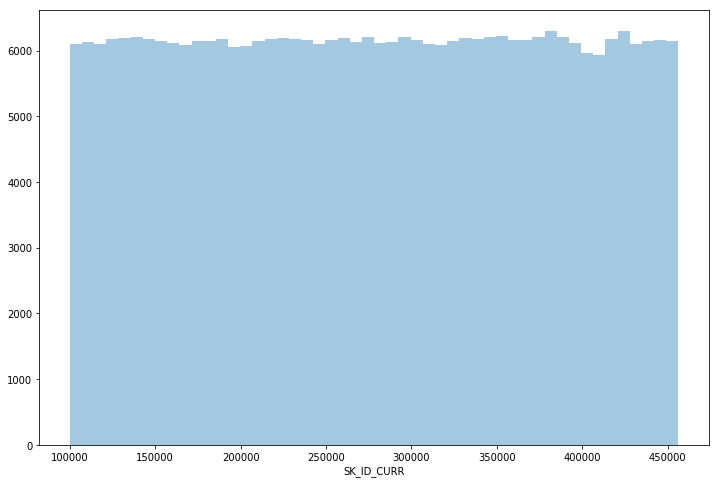

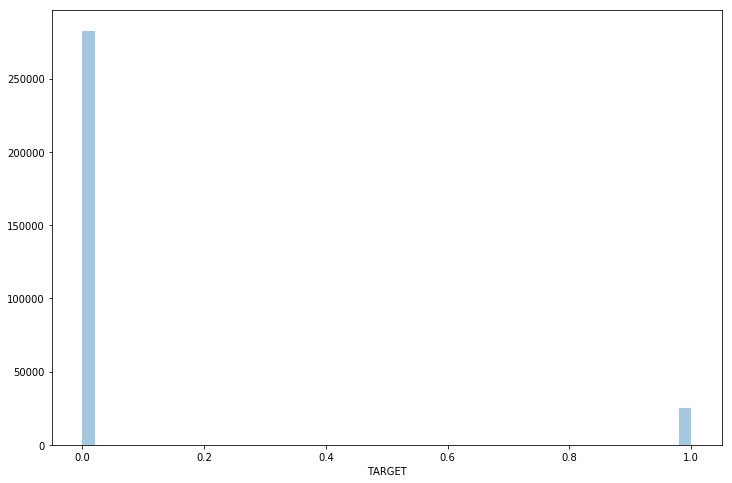

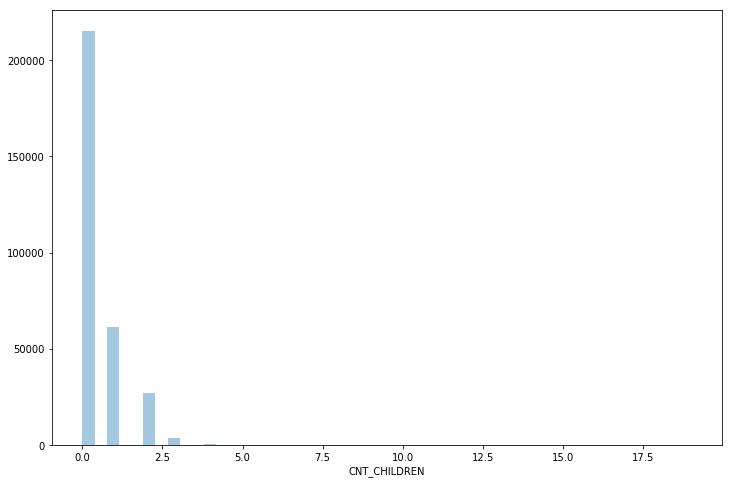

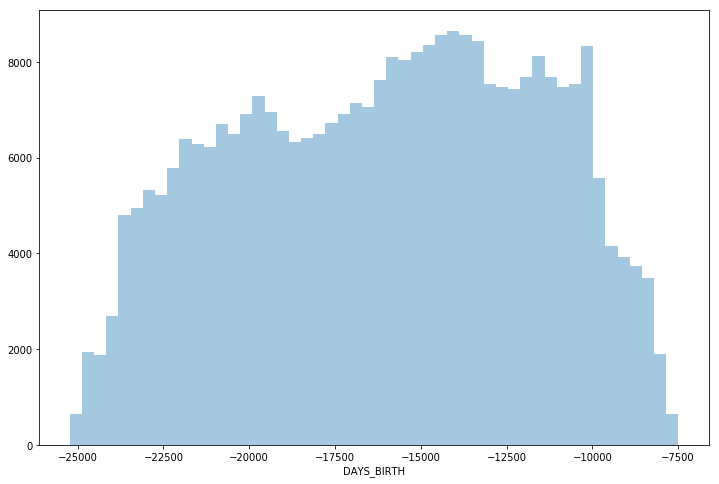

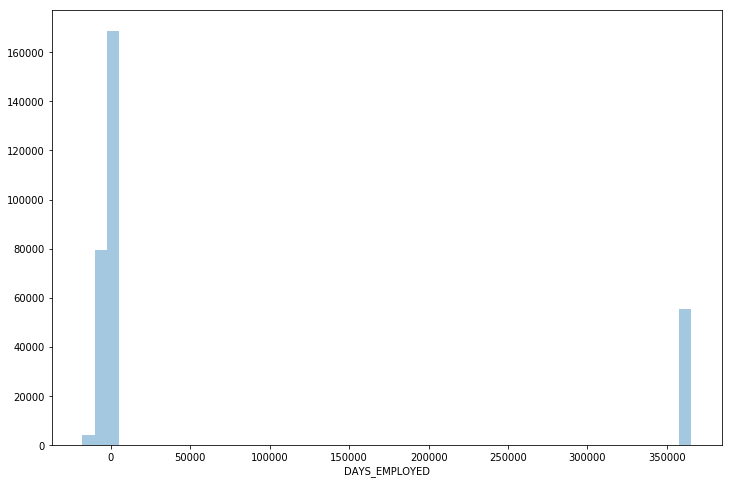

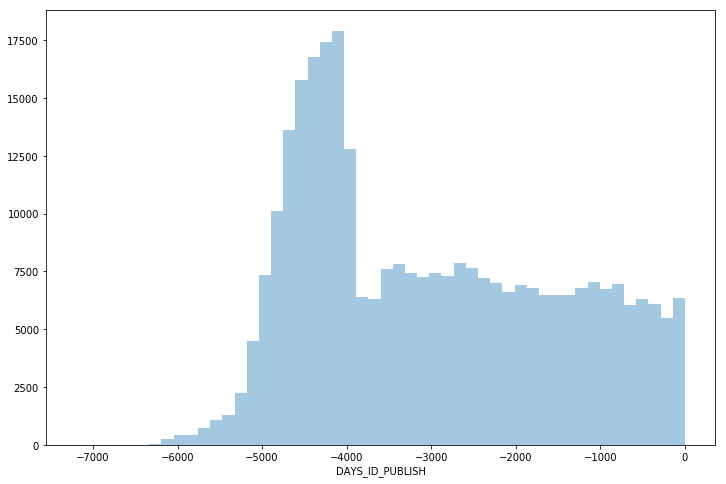

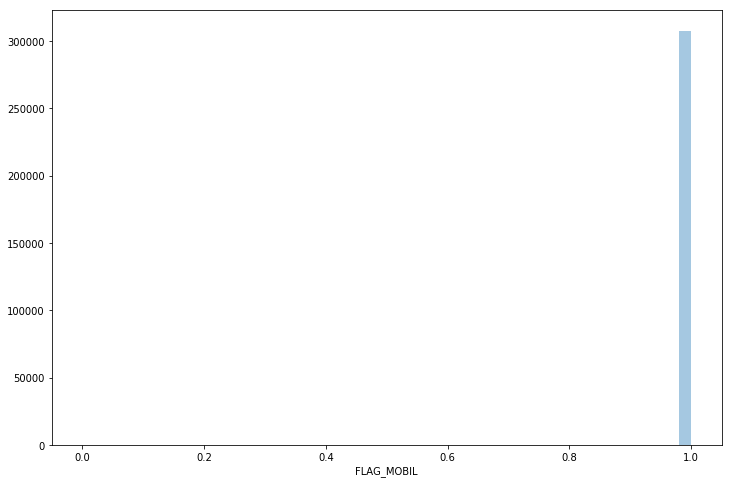

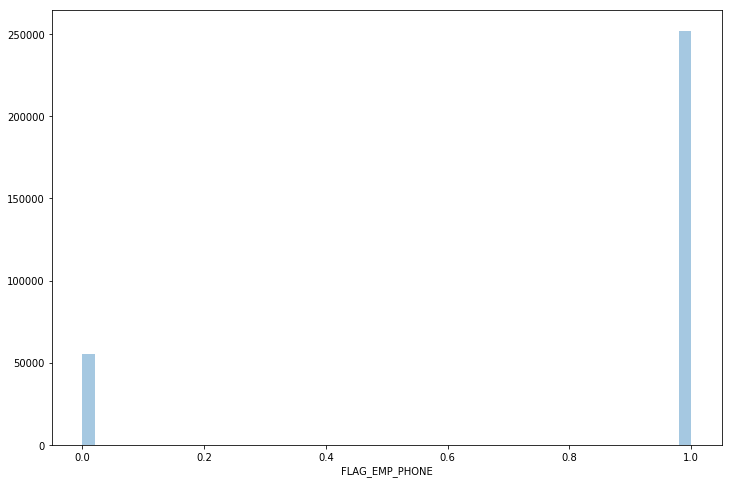

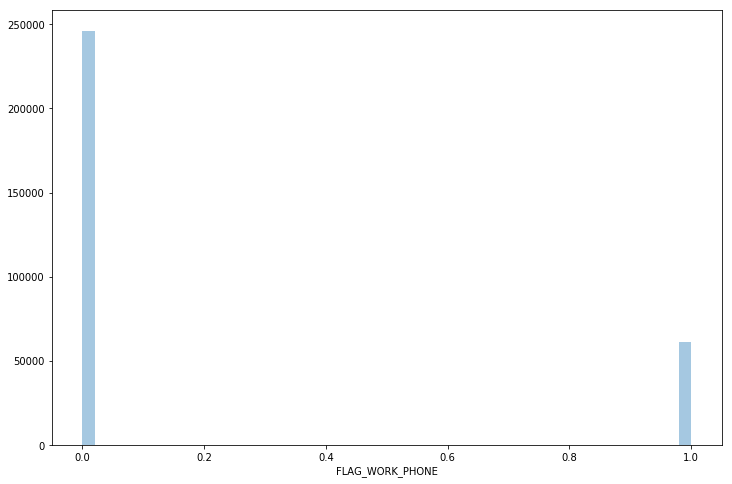

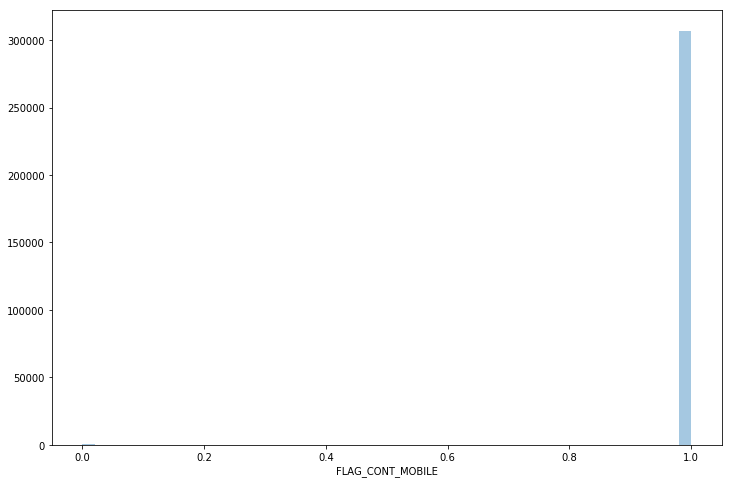

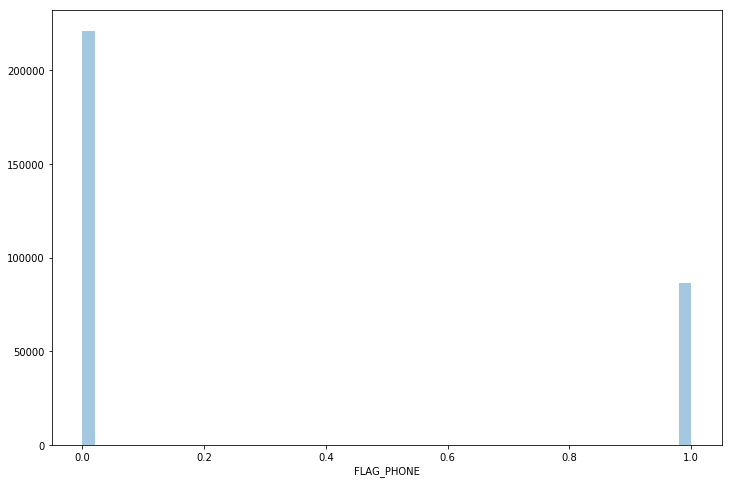

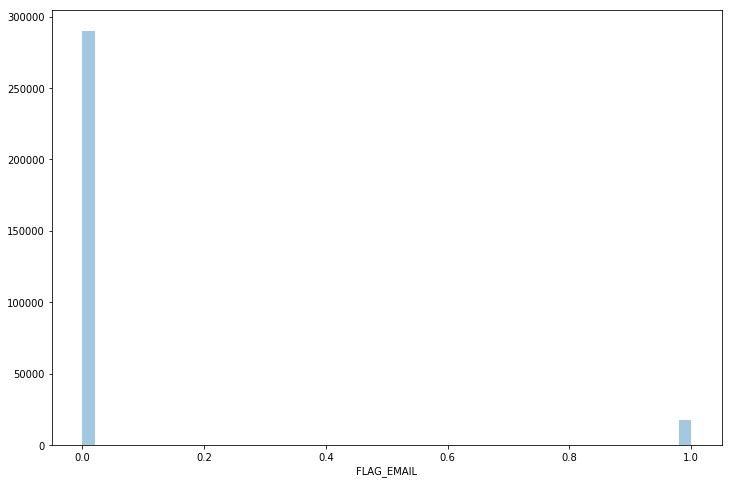

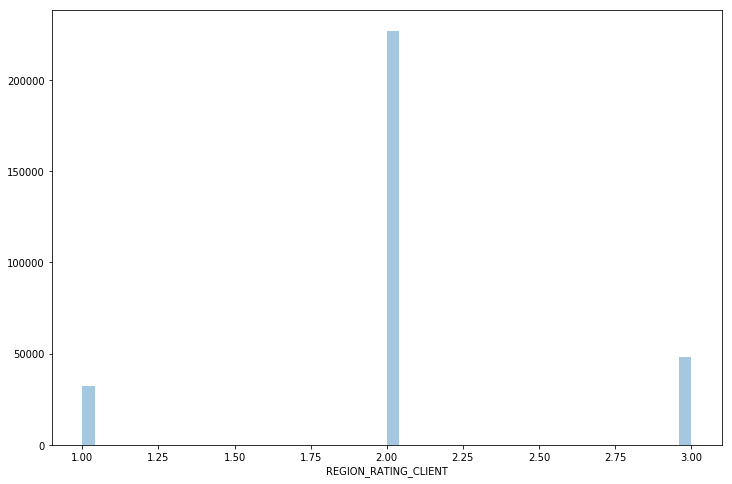

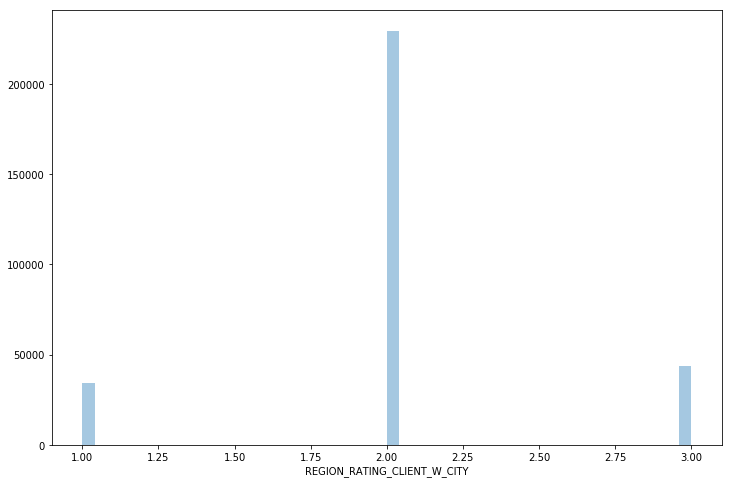

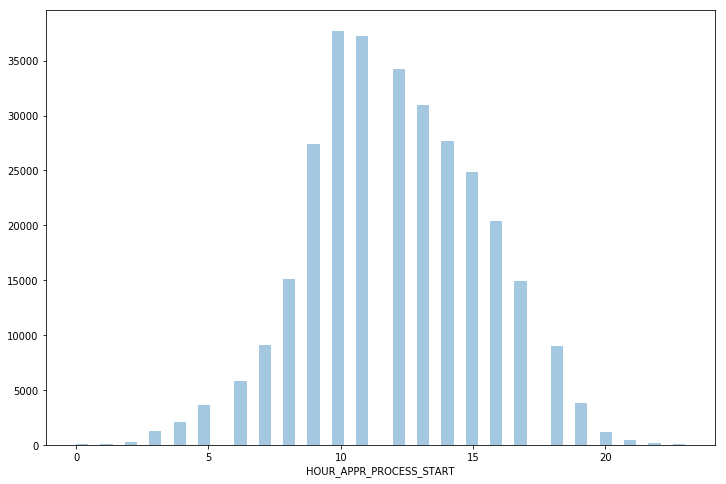

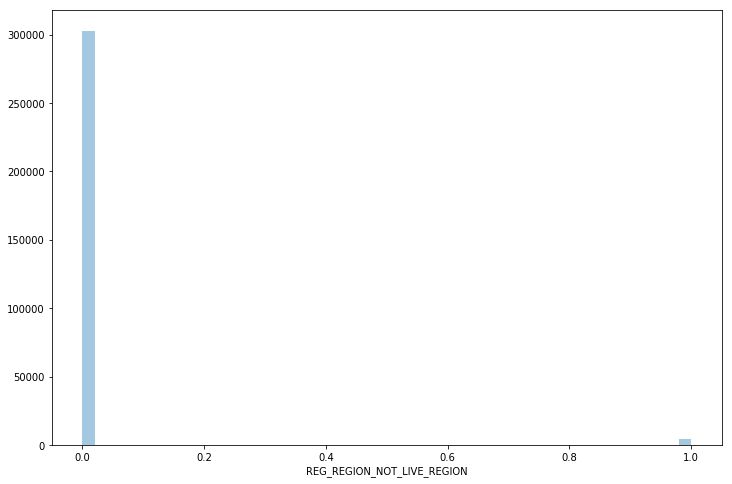

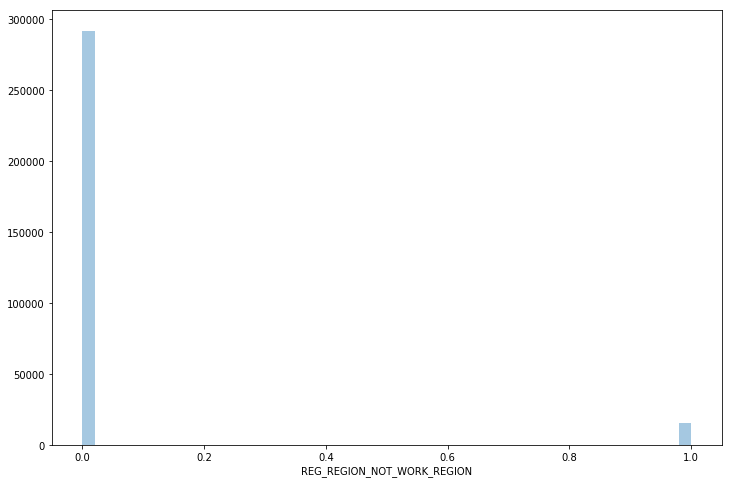

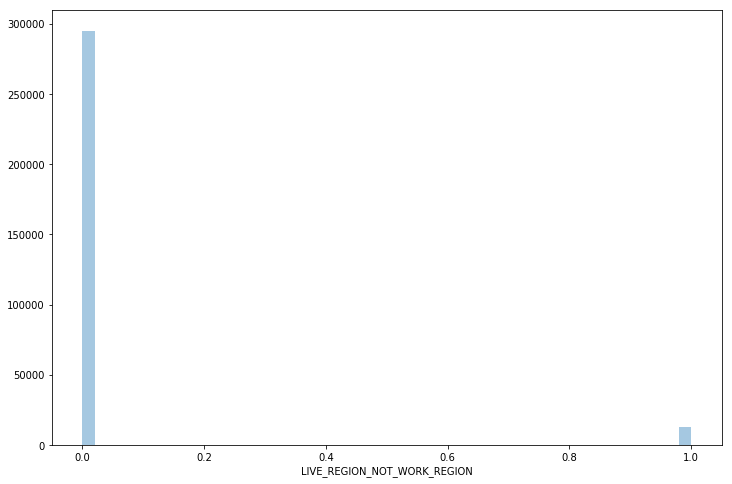

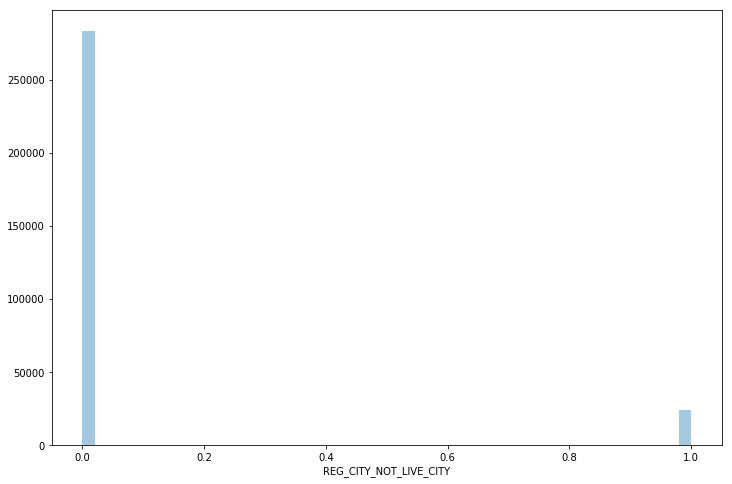

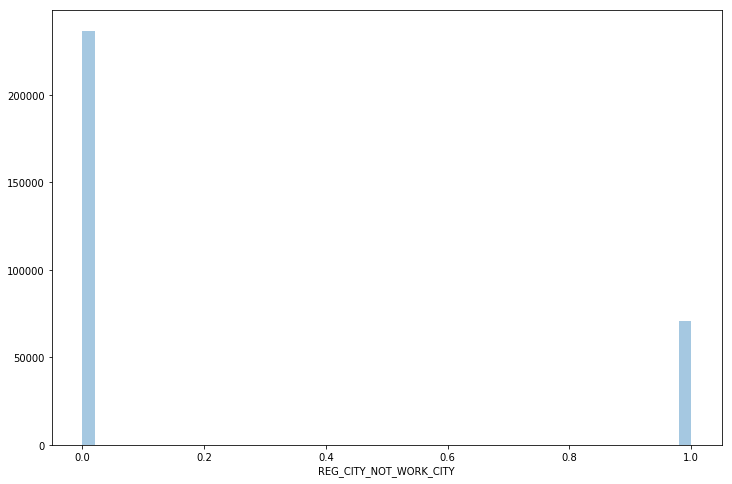

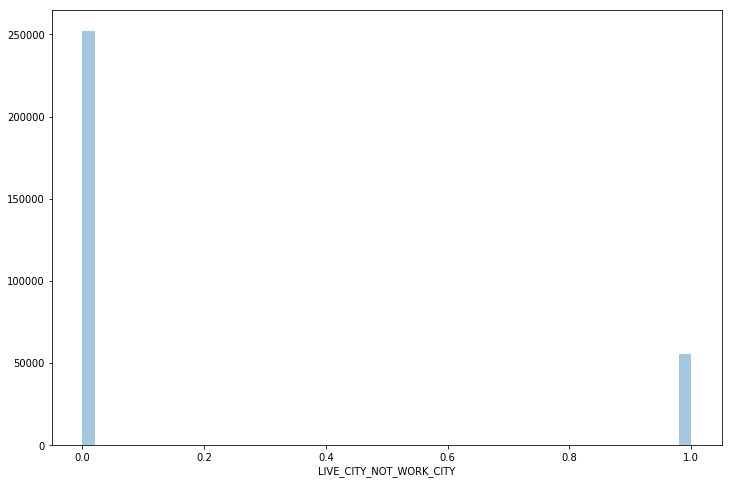

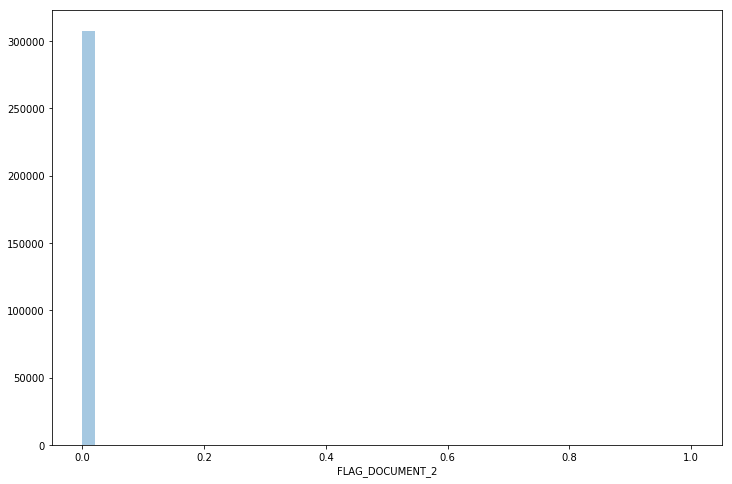

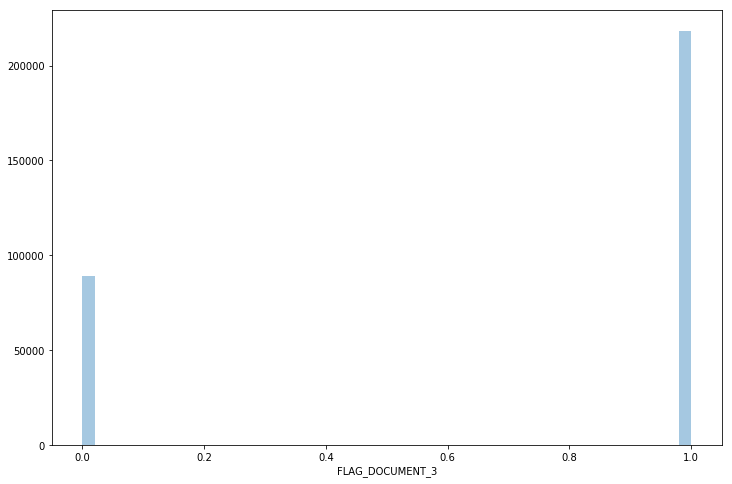

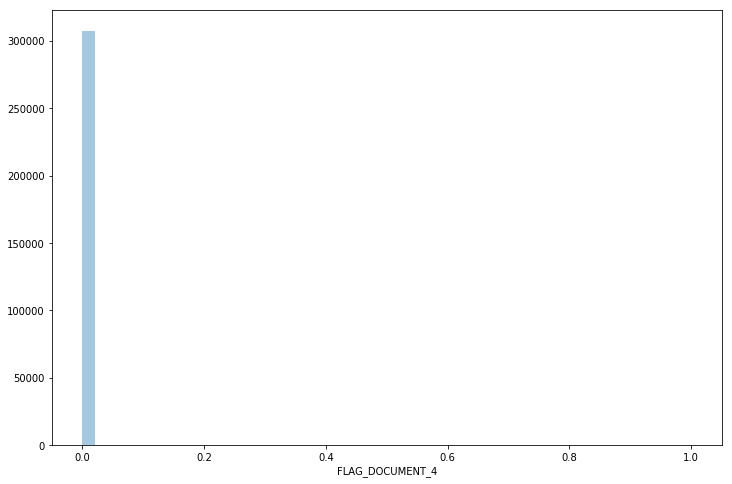

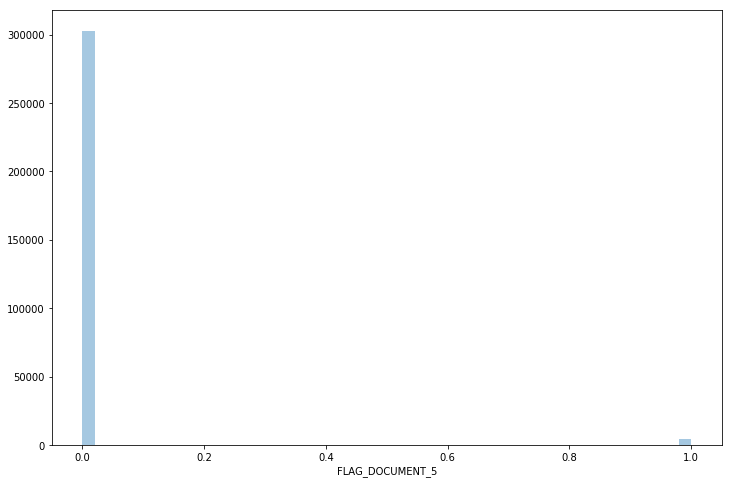

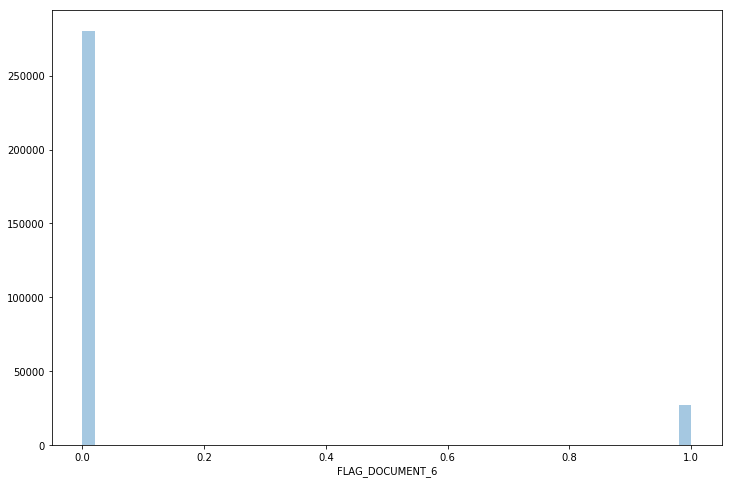

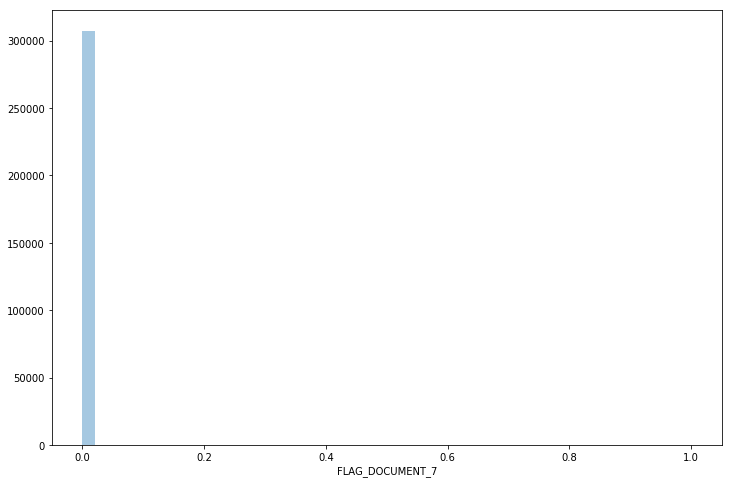

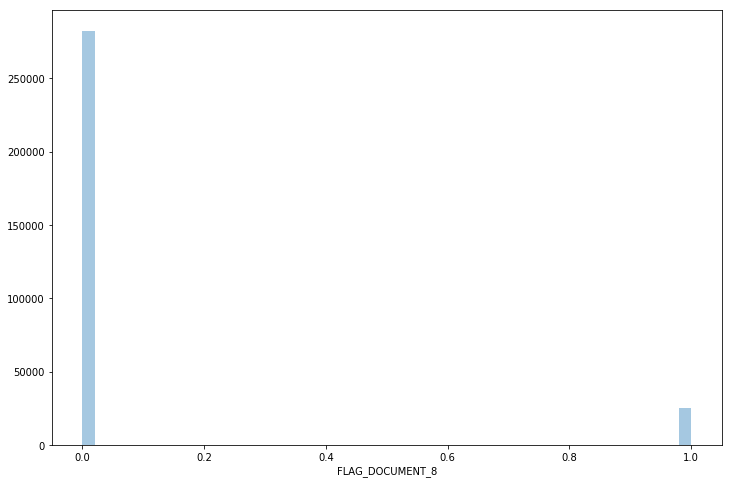

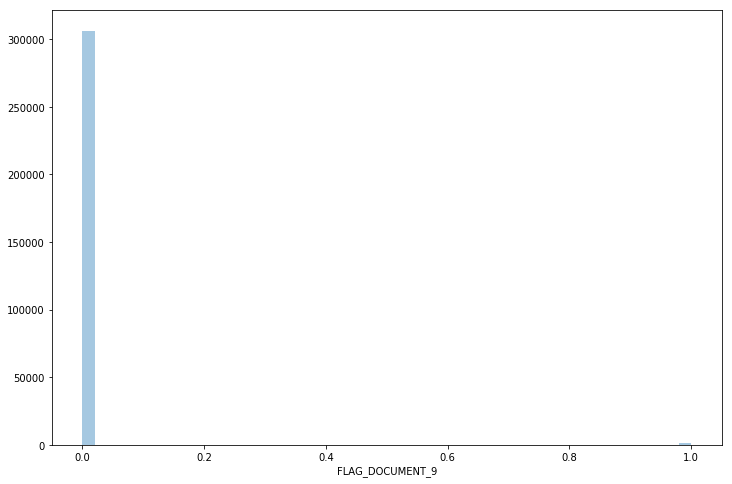

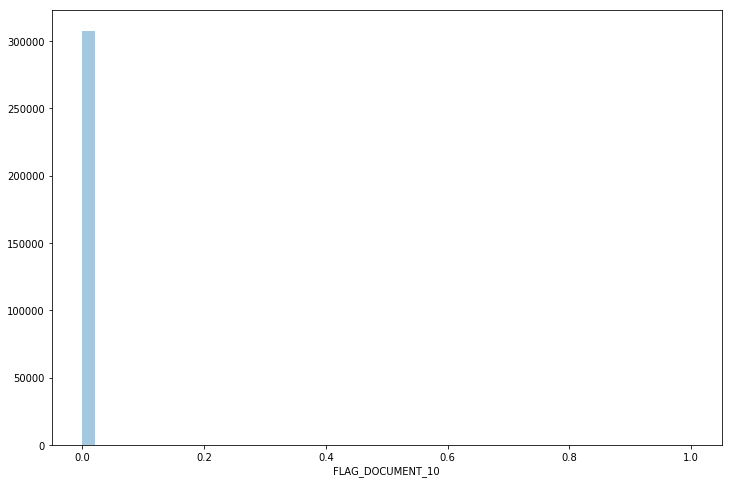

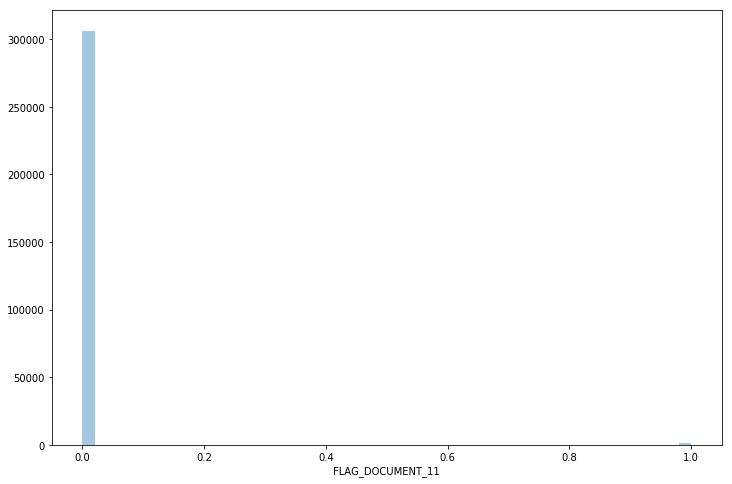

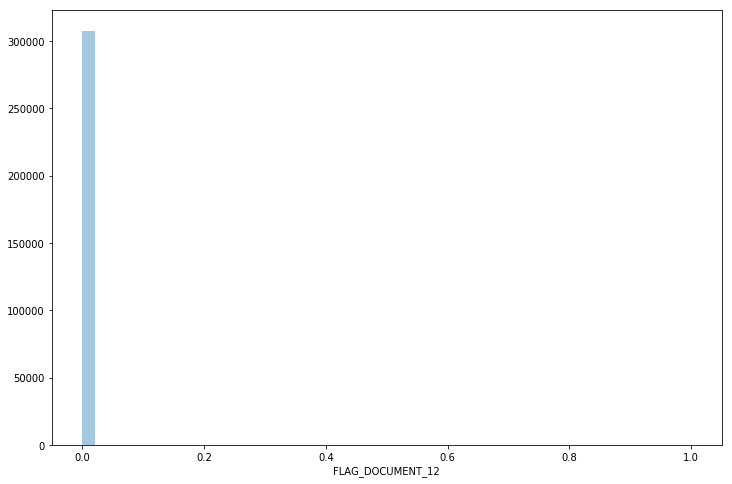

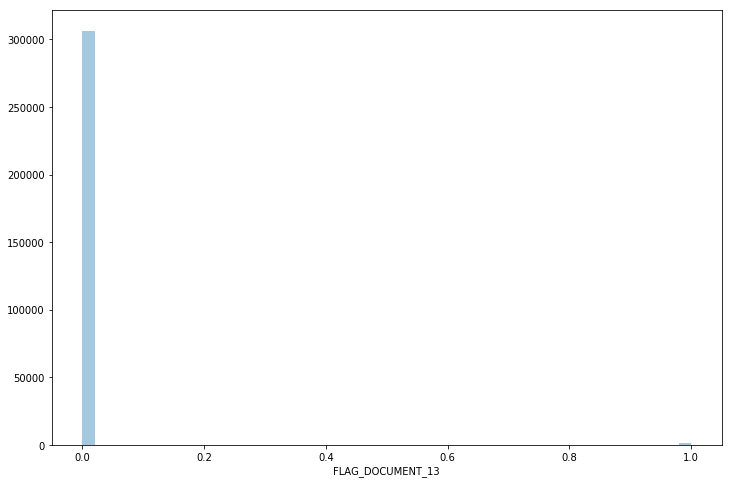

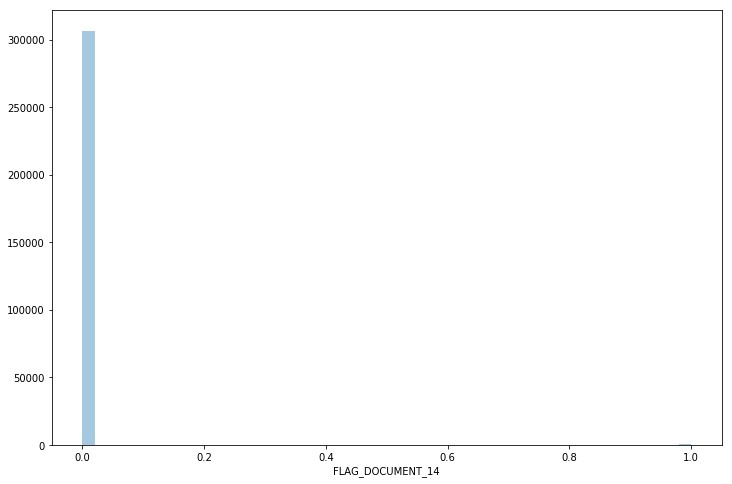

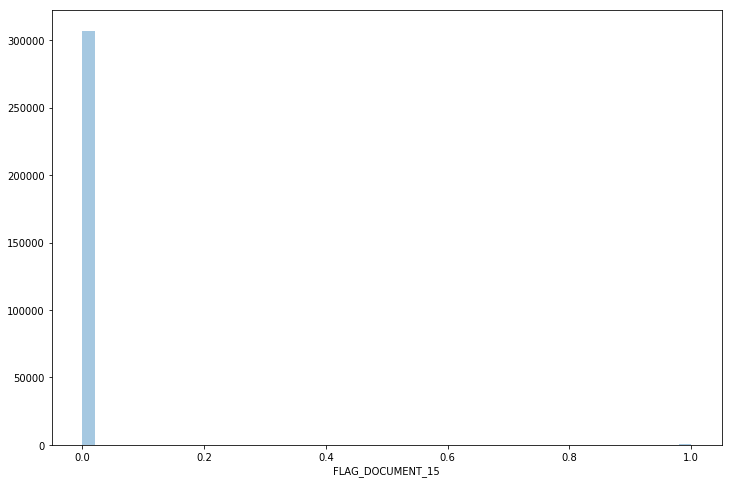

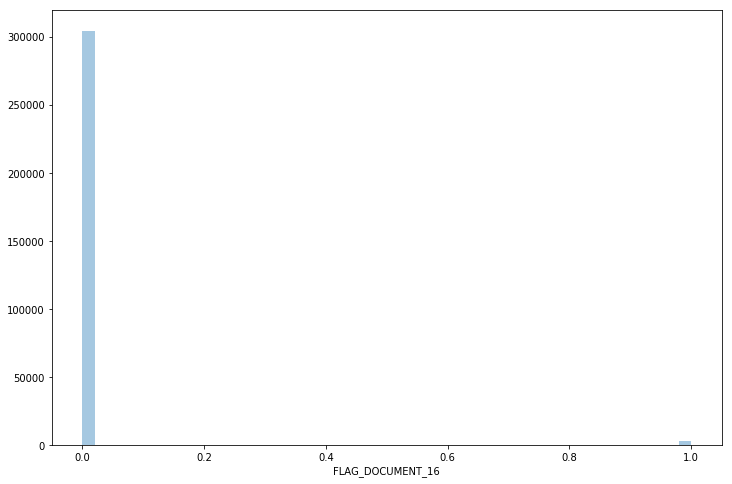

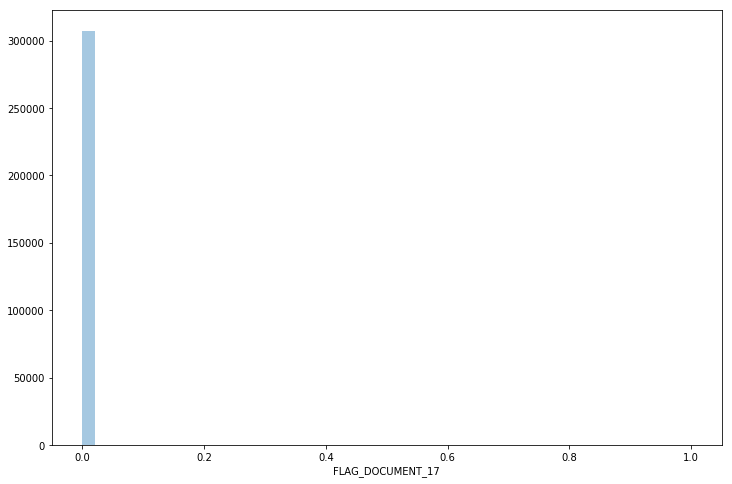

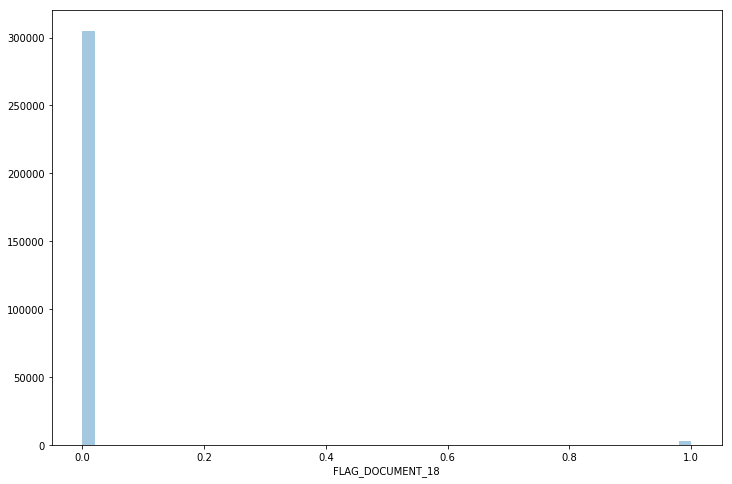

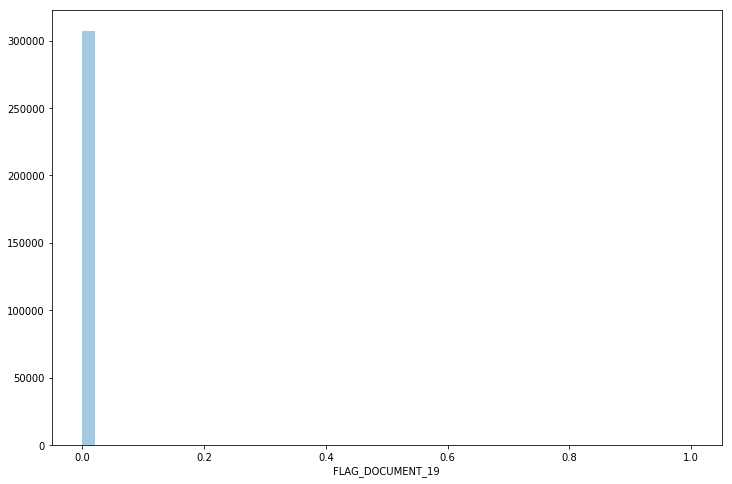

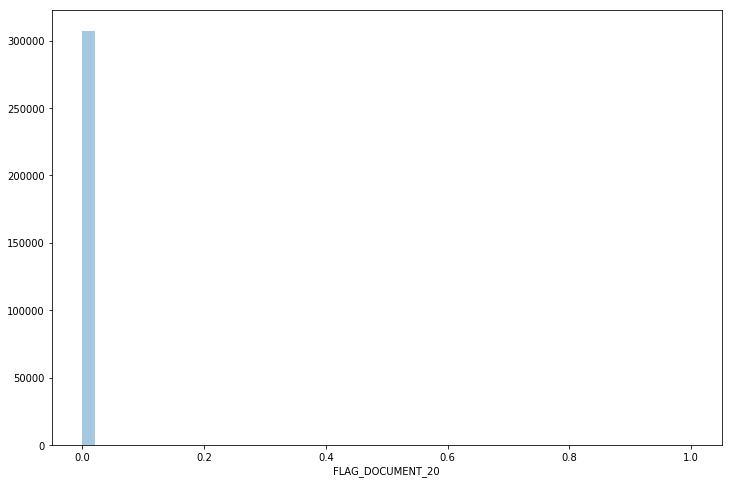

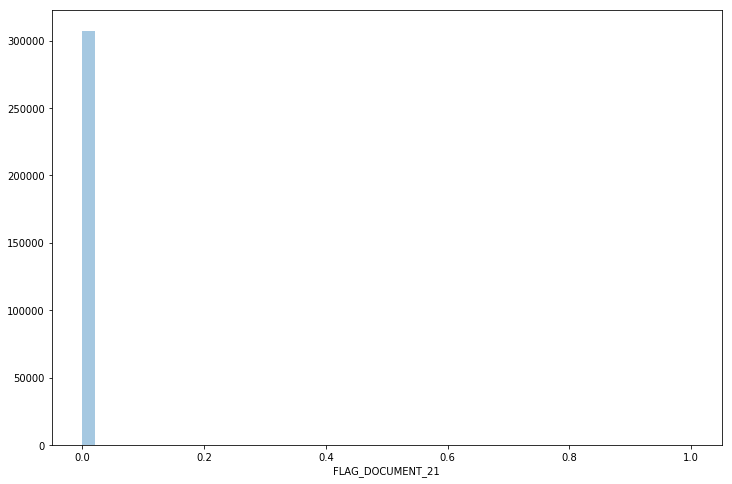

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in data.columns:
    if(data[column].dtypes=='int'):
        plt.figure(figsize=(12,8))
        type(data[column])
        sns.distplot(data[column], bins=50, kde=False)
        plt.show()

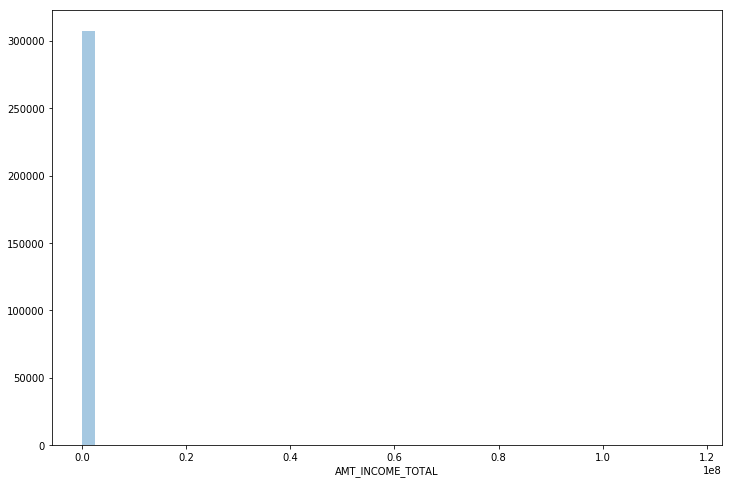

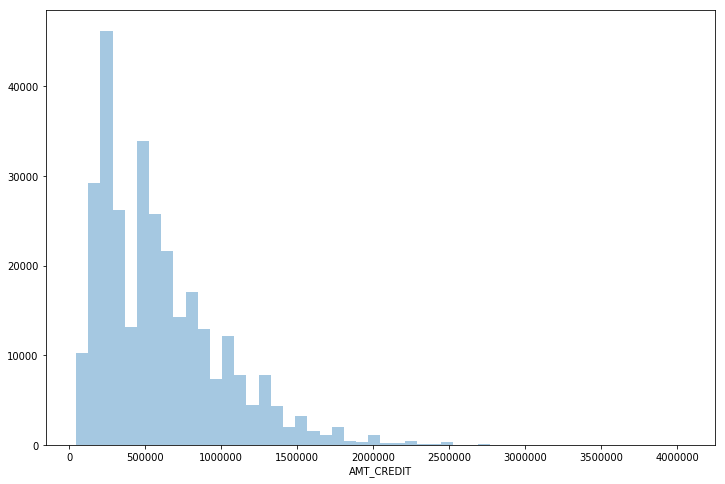

There is NaN data in column: AMT_ANNUITY


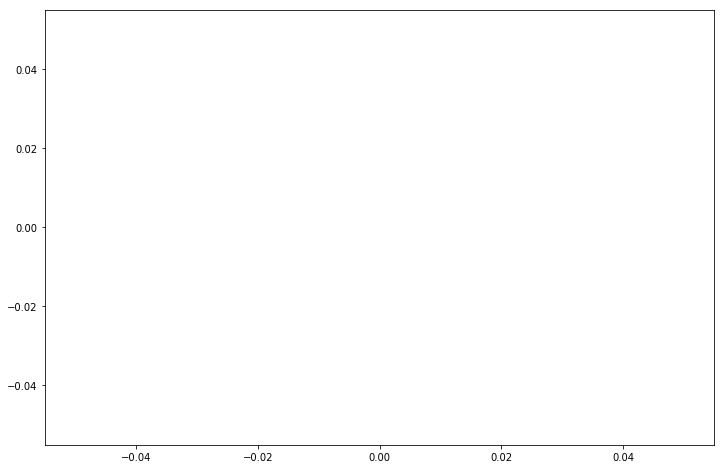

There is NaN data in column: AMT_GOODS_PRICE


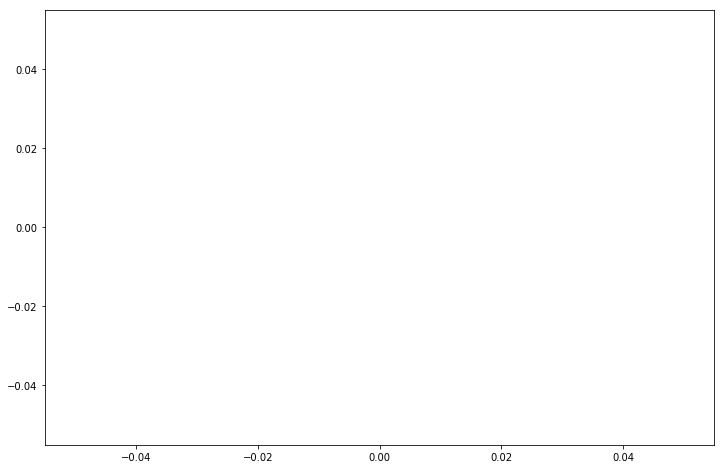

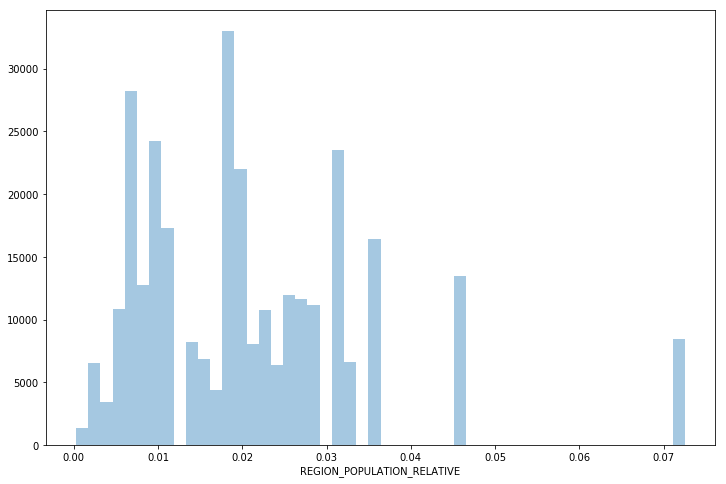

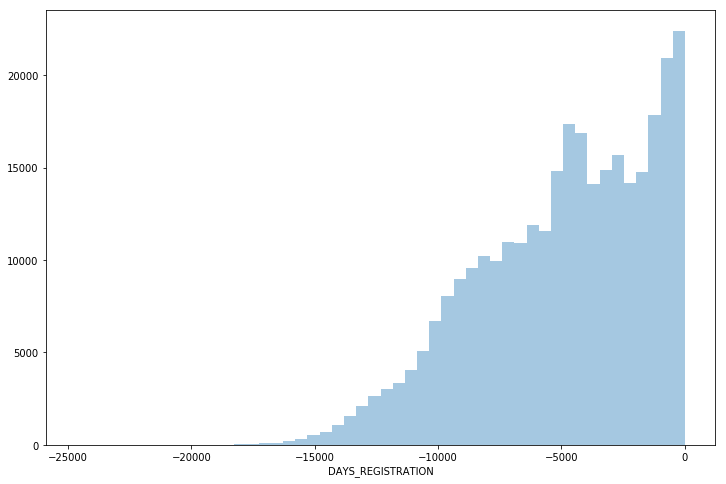

There is NaN data in column: OWN_CAR_AGE


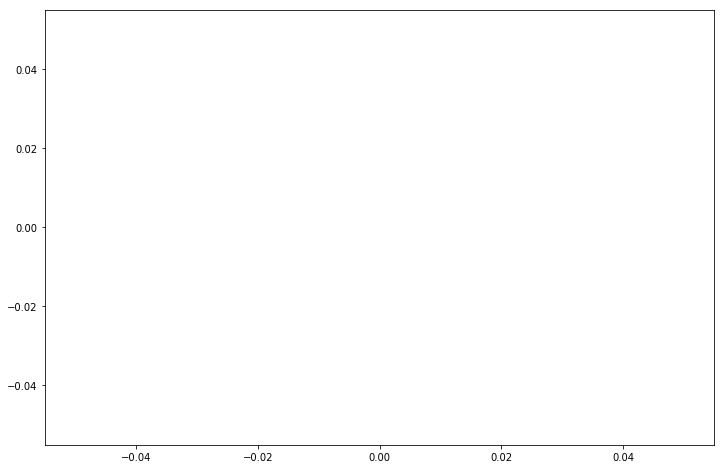

There is NaN data in column: CNT_FAM_MEMBERS


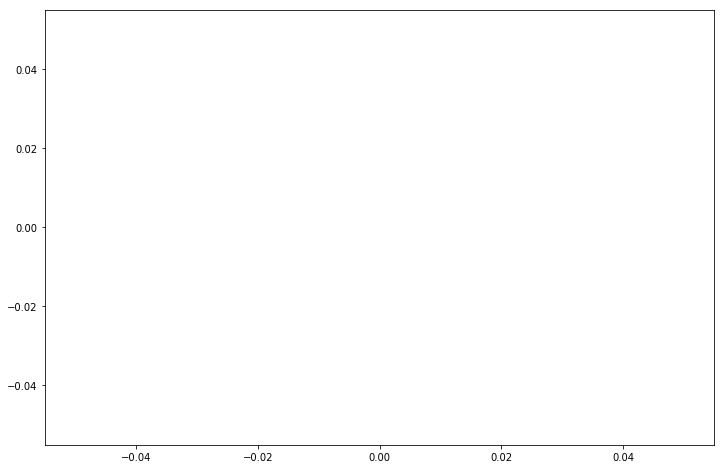

There is NaN data in column: EXT_SOURCE_1


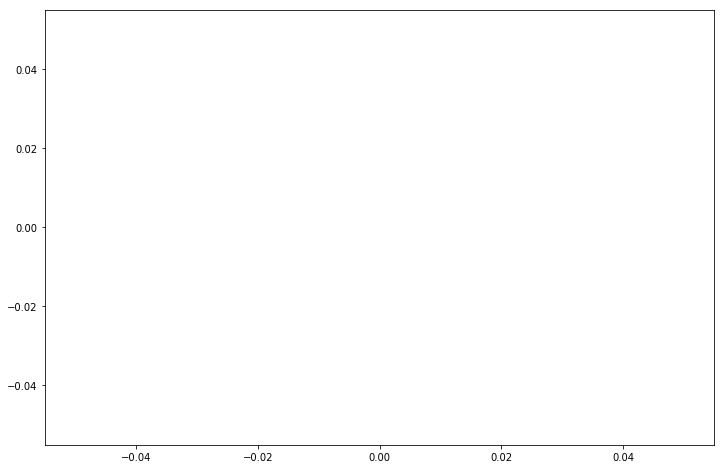

There is NaN data in column: EXT_SOURCE_2


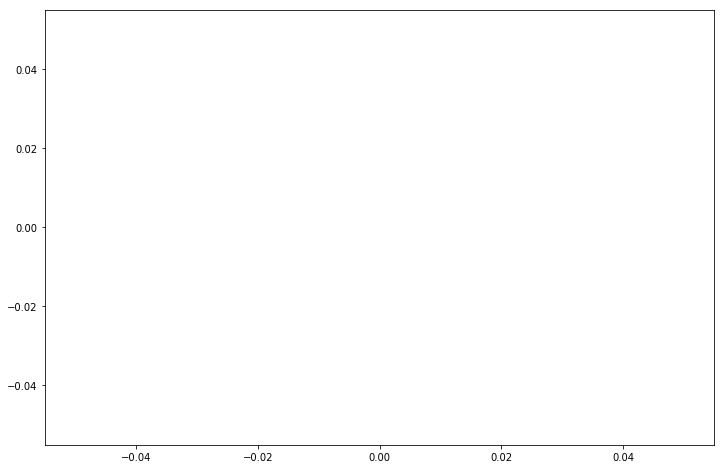

There is NaN data in column: EXT_SOURCE_3


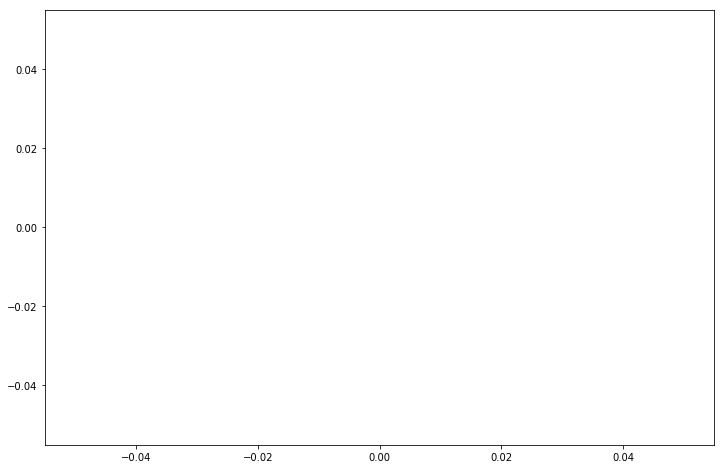

There is NaN data in column: APARTMENTS_AVG


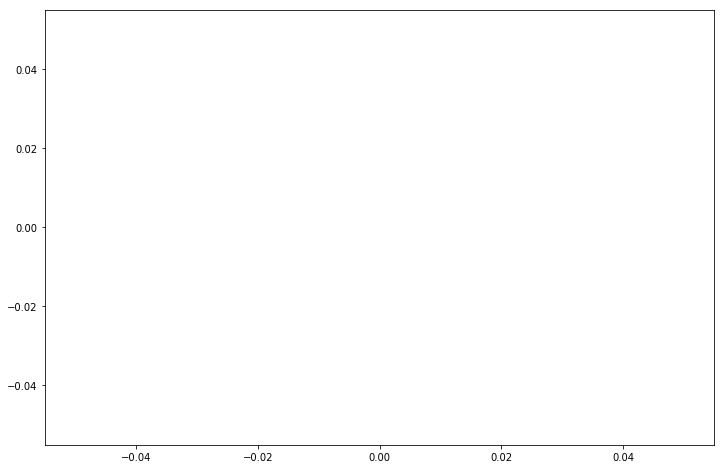

There is NaN data in column: BASEMENTAREA_AVG


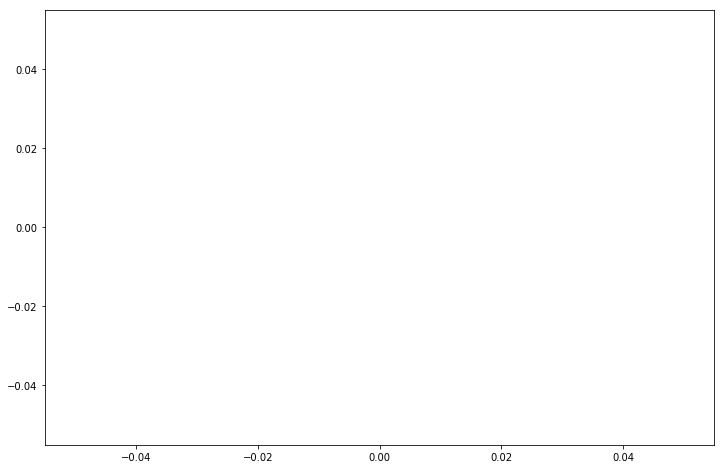

There is NaN data in column: YEARS_BEGINEXPLUATATION_AVG


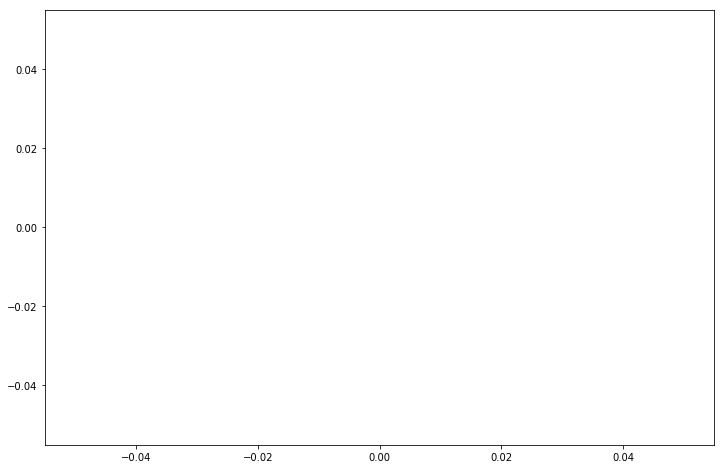

There is NaN data in column: YEARS_BUILD_AVG


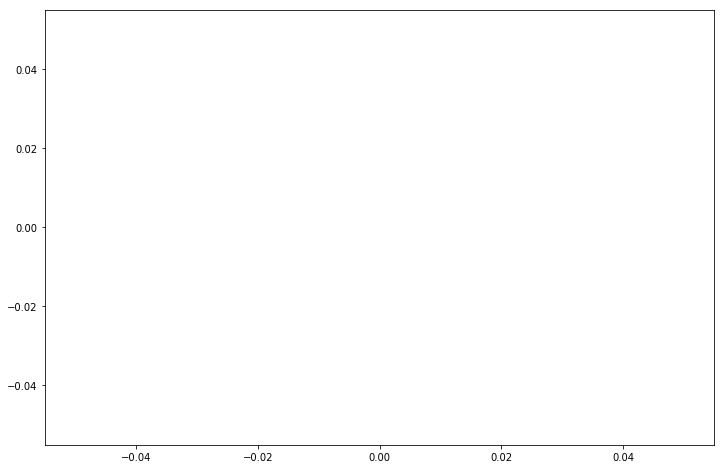

There is NaN data in column: COMMONAREA_AVG


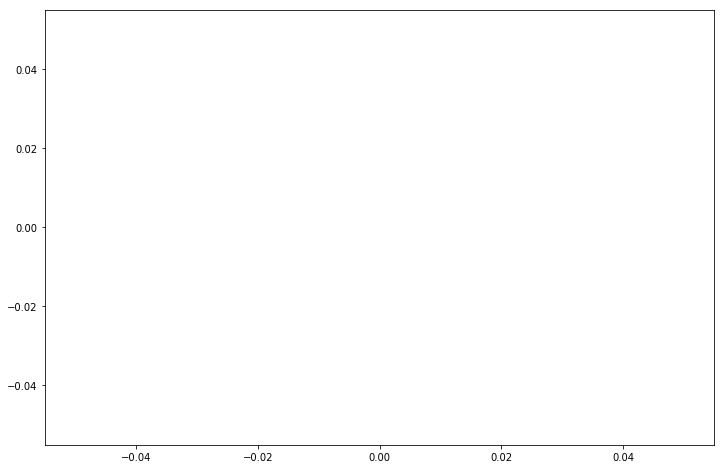

There is NaN data in column: ELEVATORS_AVG


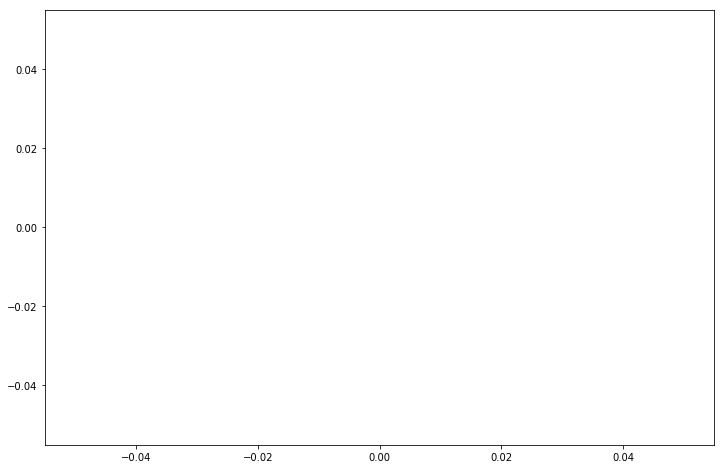

There is NaN data in column: ENTRANCES_AVG


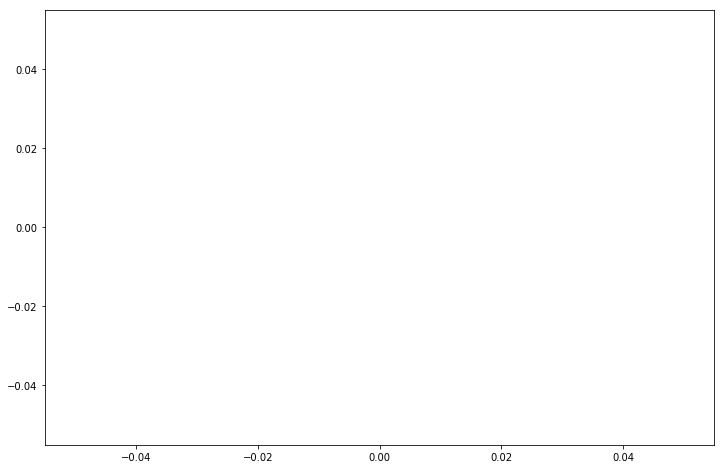

There is NaN data in column: FLOORSMAX_AVG


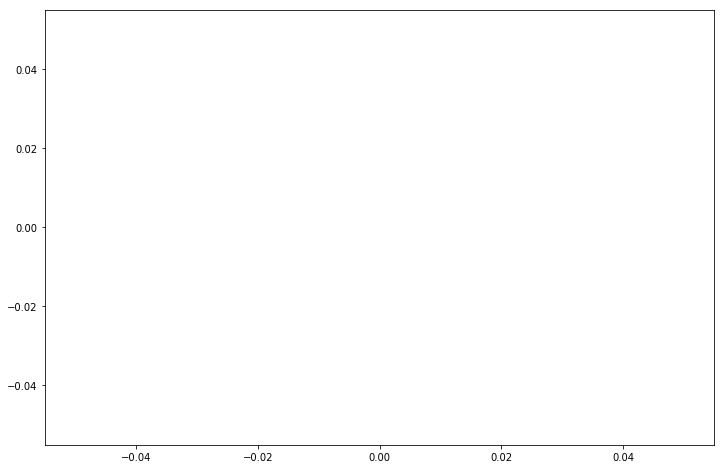

There is NaN data in column: FLOORSMIN_AVG


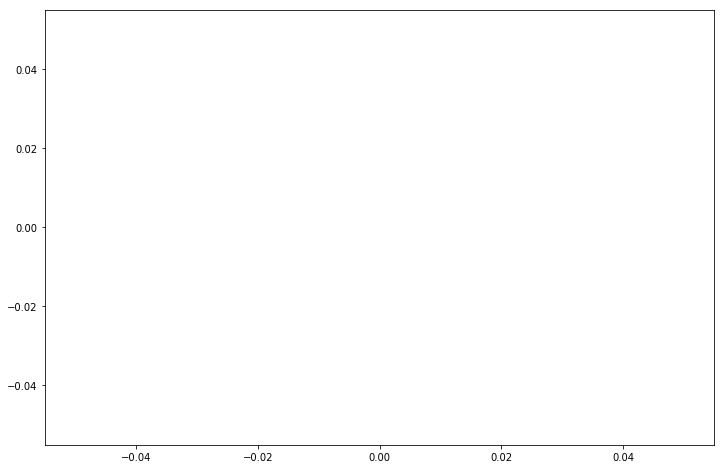

There is NaN data in column: LANDAREA_AVG


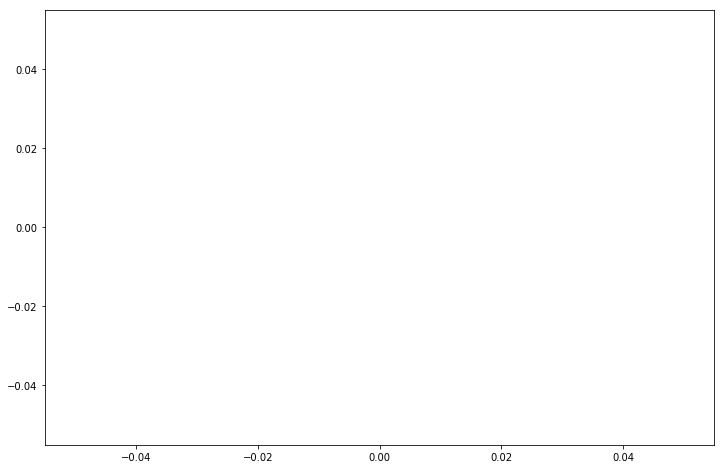

There is NaN data in column: LIVINGAPARTMENTS_AVG


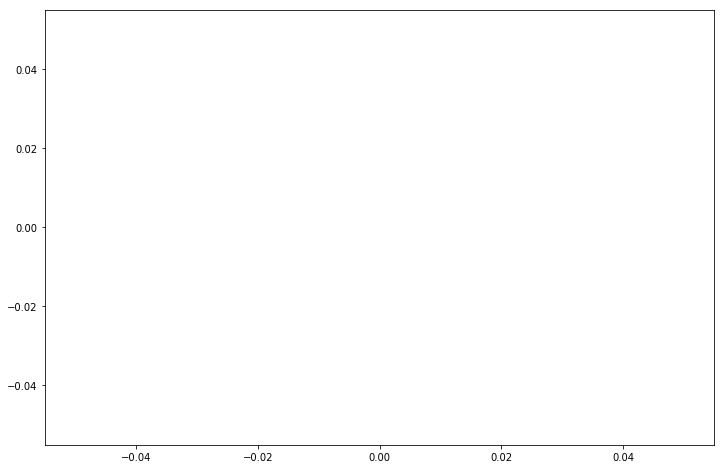

There is NaN data in column: LIVINGAREA_AVG


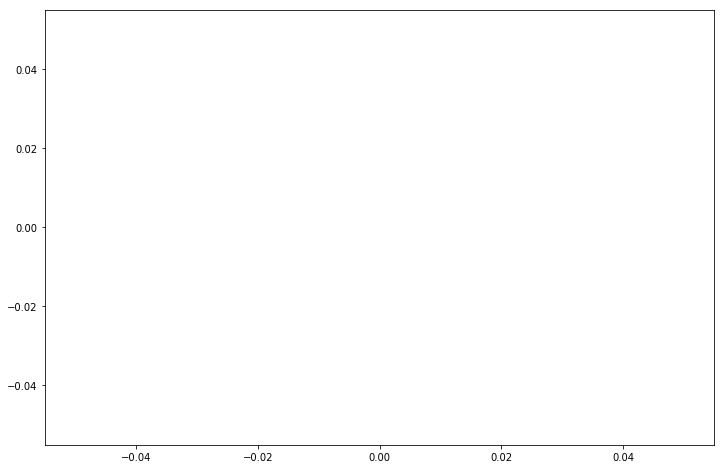

There is NaN data in column: NONLIVINGAPARTMENTS_AVG


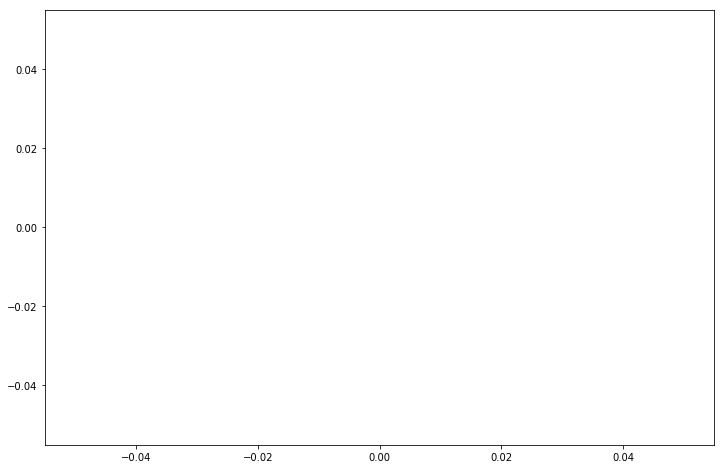

There is NaN data in column: NONLIVINGAREA_AVG


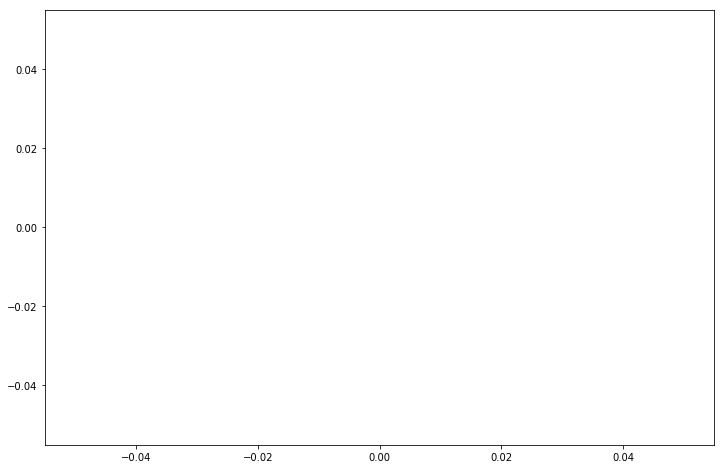

There is NaN data in column: APARTMENTS_MODE


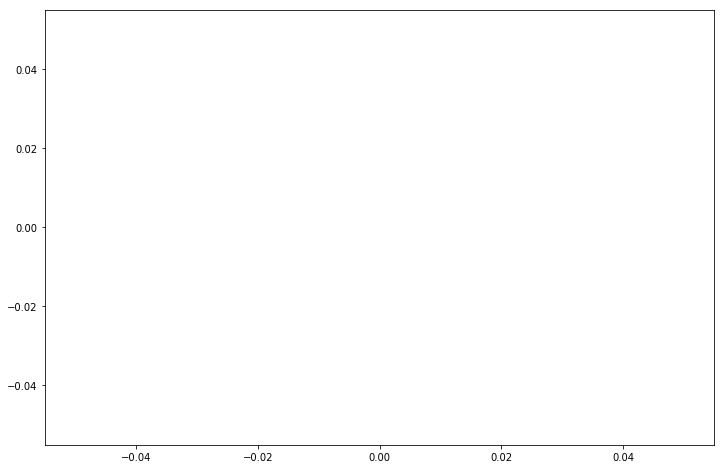

There is NaN data in column: BASEMENTAREA_MODE


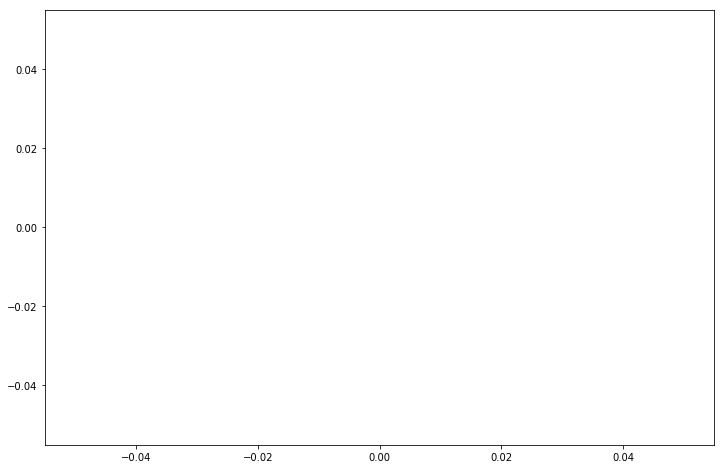

There is NaN data in column: YEARS_BEGINEXPLUATATION_MODE


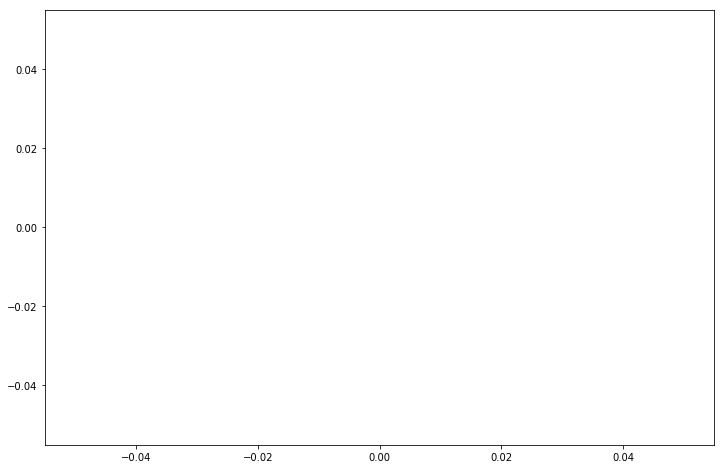

There is NaN data in column: YEARS_BUILD_MODE


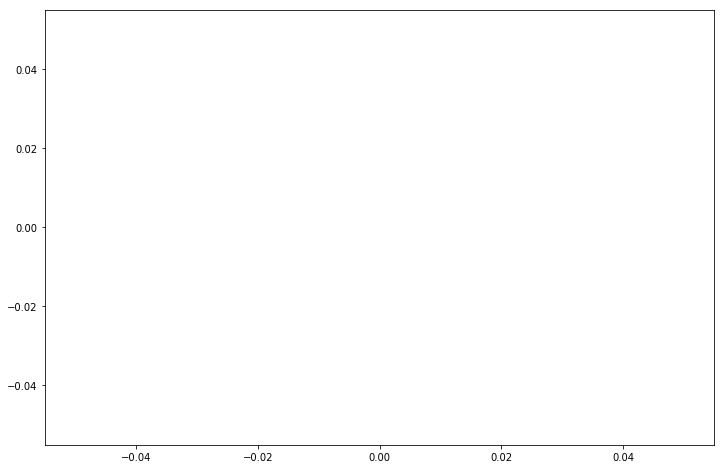

There is NaN data in column: COMMONAREA_MODE


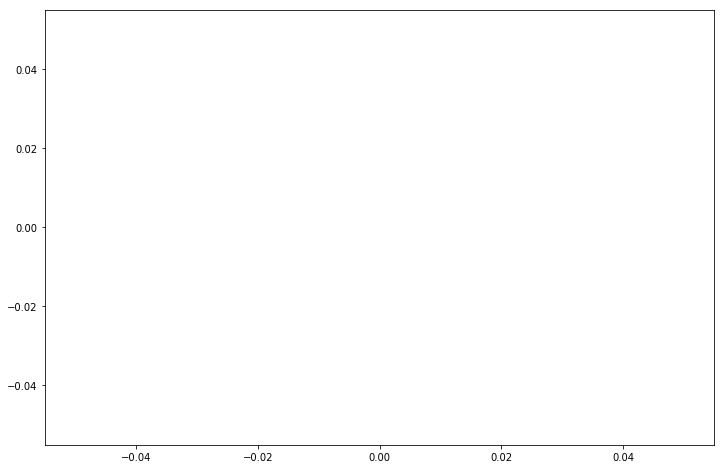

There is NaN data in column: ELEVATORS_MODE


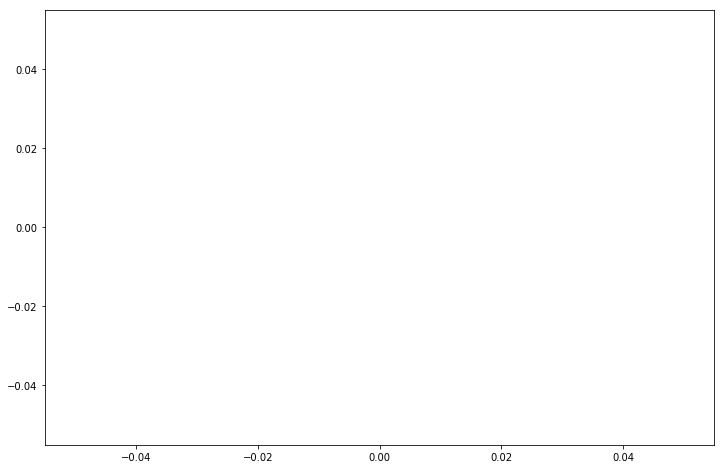

There is NaN data in column: ENTRANCES_MODE


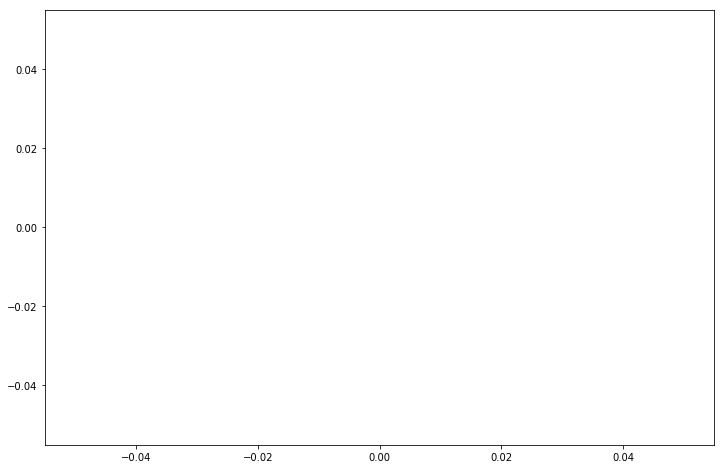

There is NaN data in column: FLOORSMAX_MODE


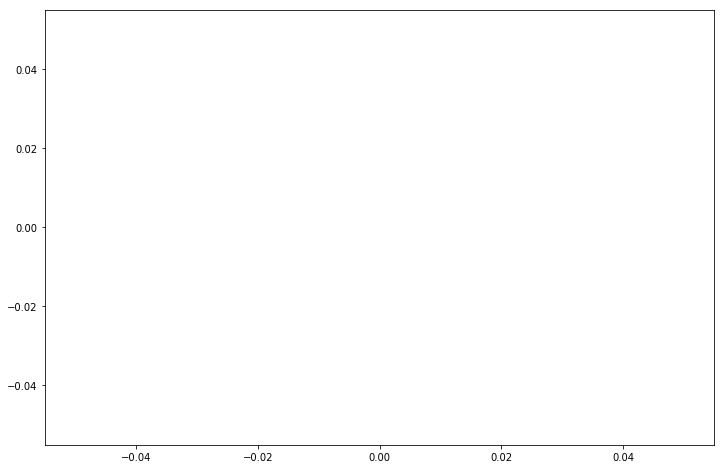

There is NaN data in column: FLOORSMIN_MODE


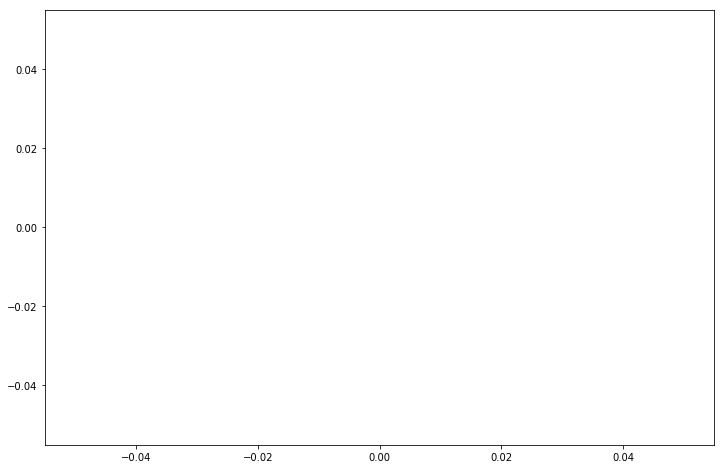

There is NaN data in column: LANDAREA_MODE


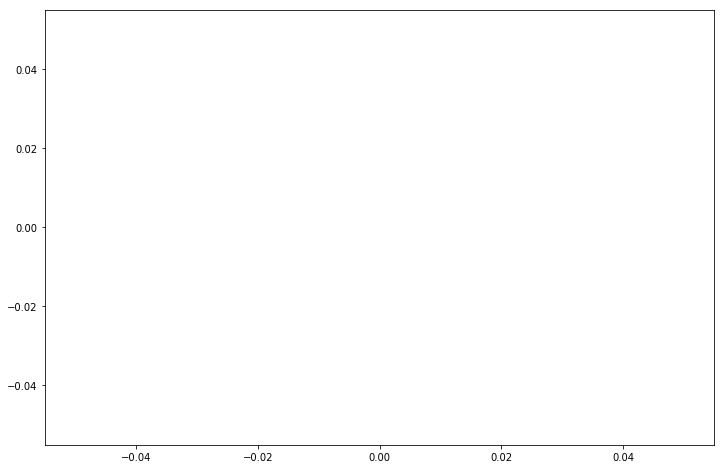

There is NaN data in column: LIVINGAPARTMENTS_MODE


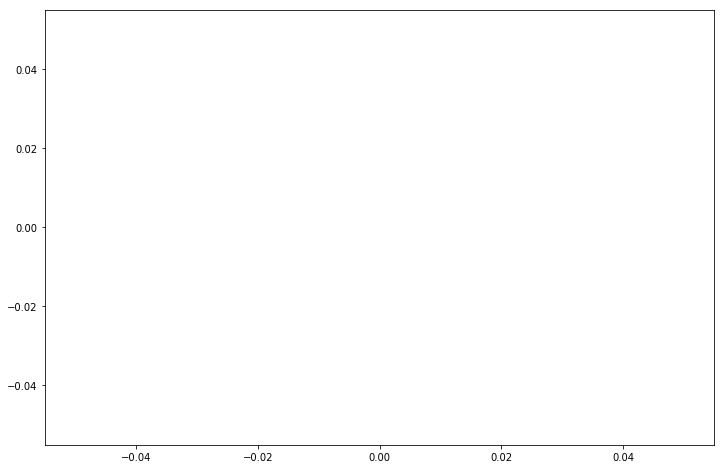

There is NaN data in column: LIVINGAREA_MODE


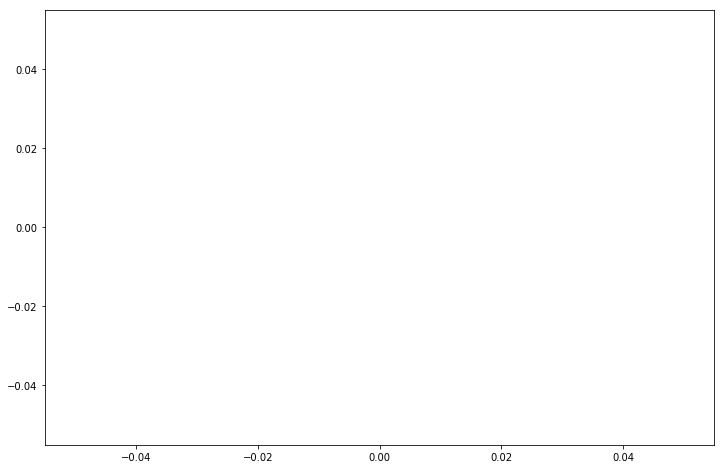

There is NaN data in column: NONLIVINGAPARTMENTS_MODE


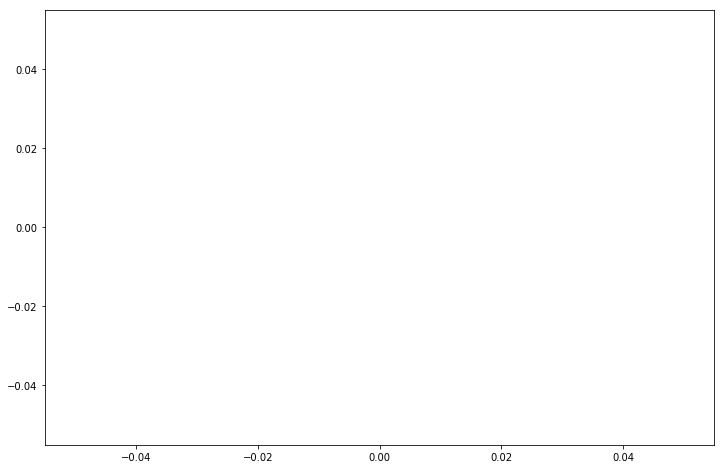

There is NaN data in column: NONLIVINGAREA_MODE


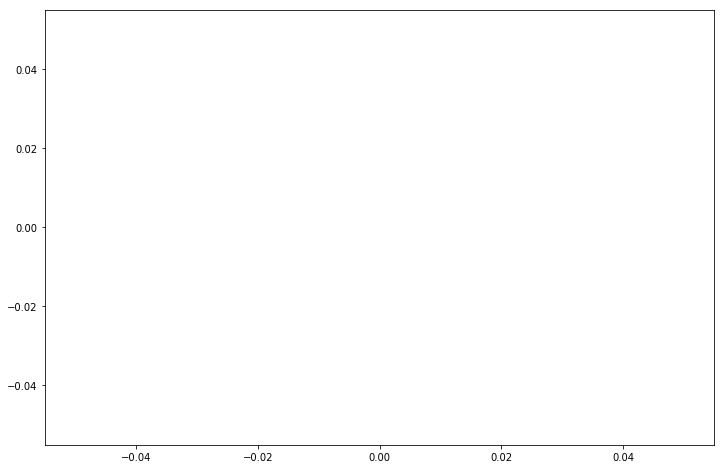

There is NaN data in column: APARTMENTS_MEDI


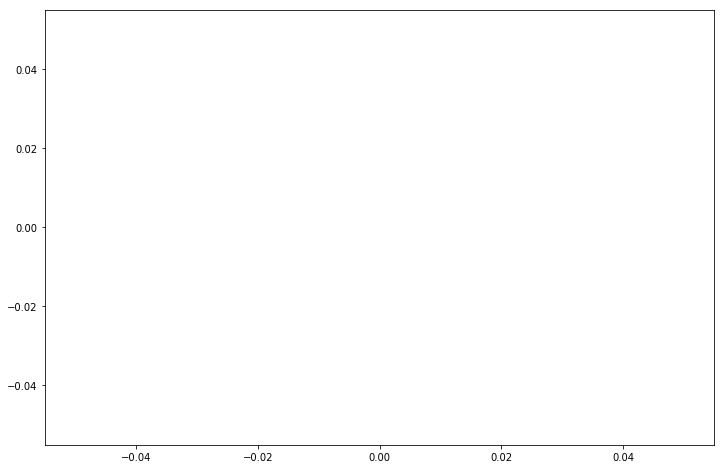

There is NaN data in column: BASEMENTAREA_MEDI


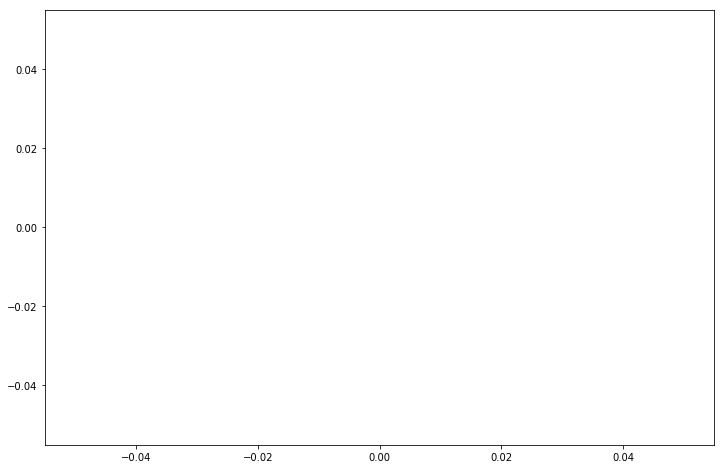

There is NaN data in column: YEARS_BEGINEXPLUATATION_MEDI


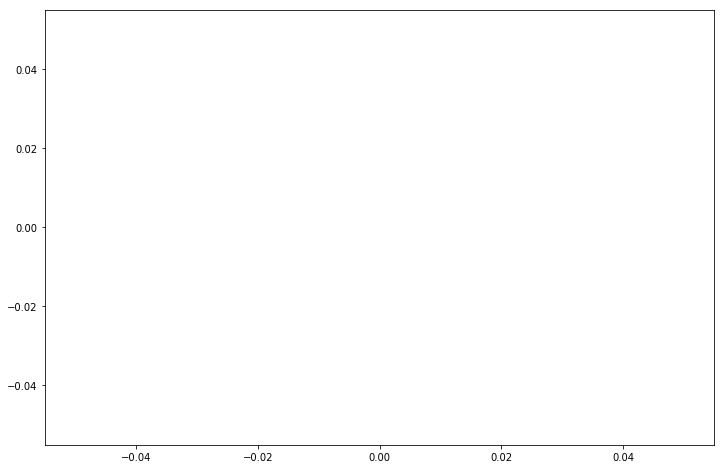

There is NaN data in column: YEARS_BUILD_MEDI


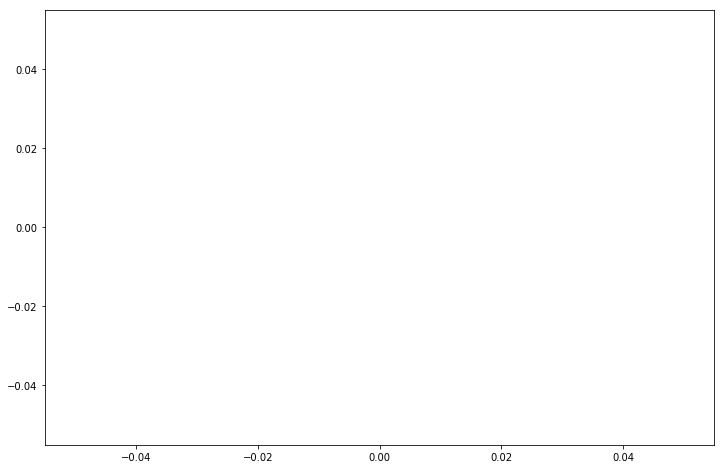

There is NaN data in column: COMMONAREA_MEDI


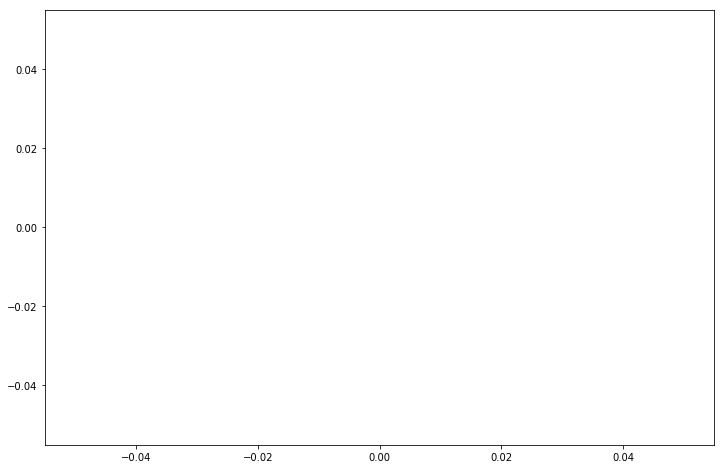

There is NaN data in column: ELEVATORS_MEDI


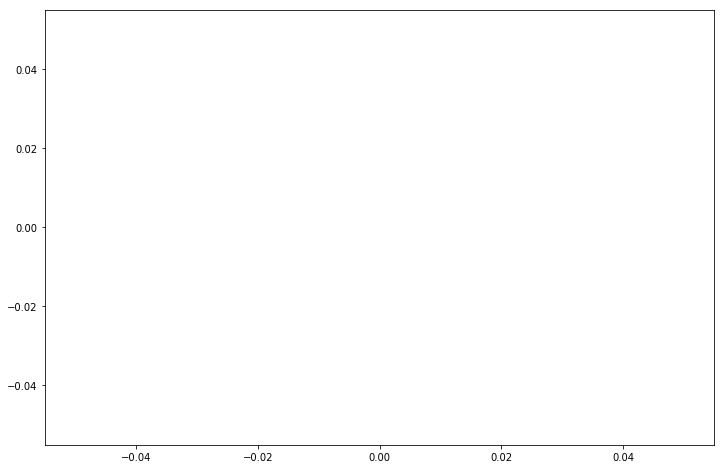

There is NaN data in column: ENTRANCES_MEDI


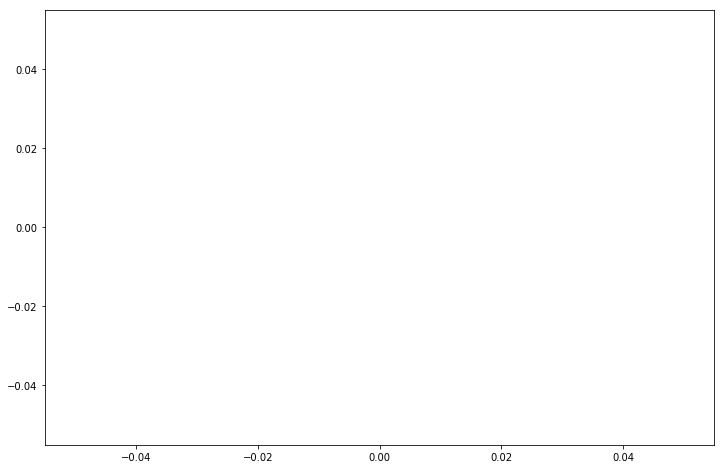

There is NaN data in column: FLOORSMAX_MEDI


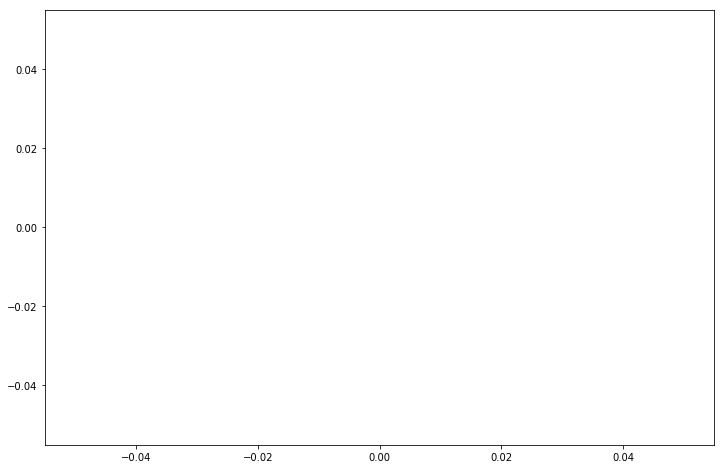

There is NaN data in column: FLOORSMIN_MEDI


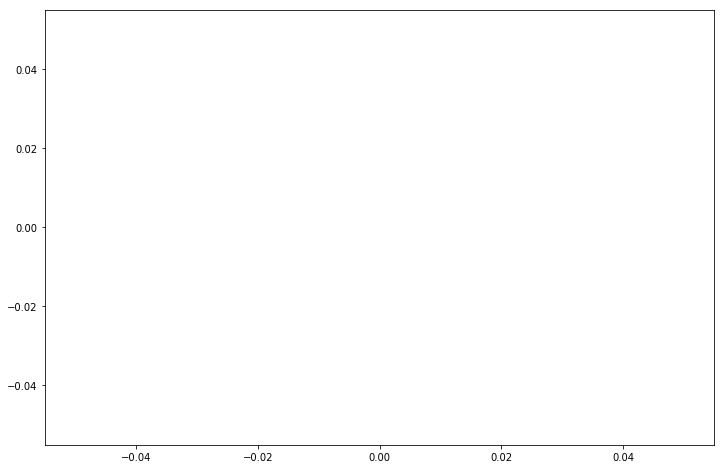

There is NaN data in column: LANDAREA_MEDI


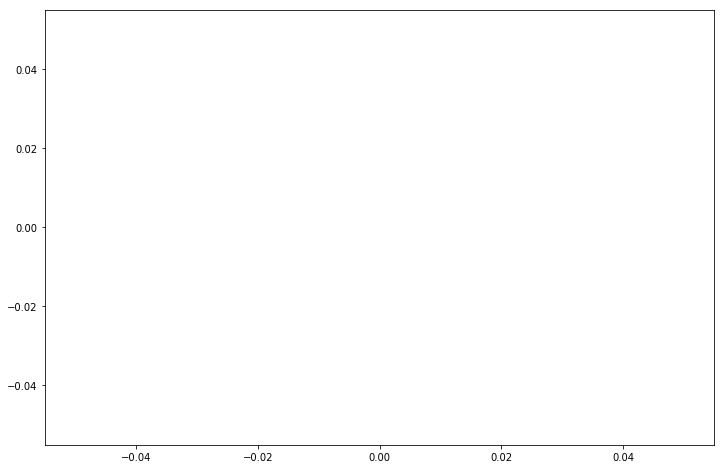

There is NaN data in column: LIVINGAPARTMENTS_MEDI


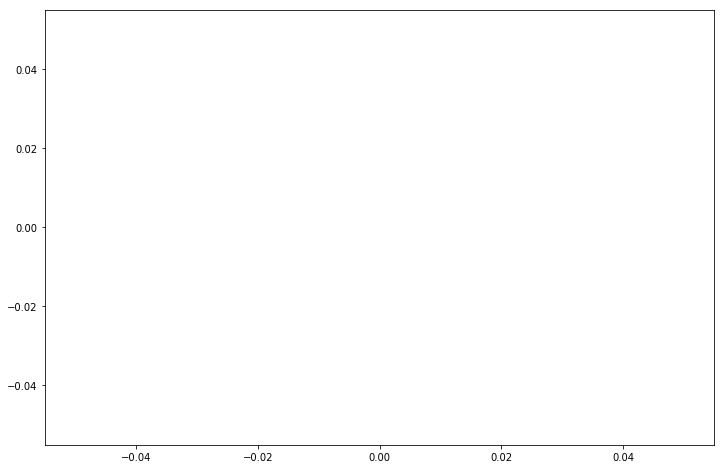

There is NaN data in column: LIVINGAREA_MEDI


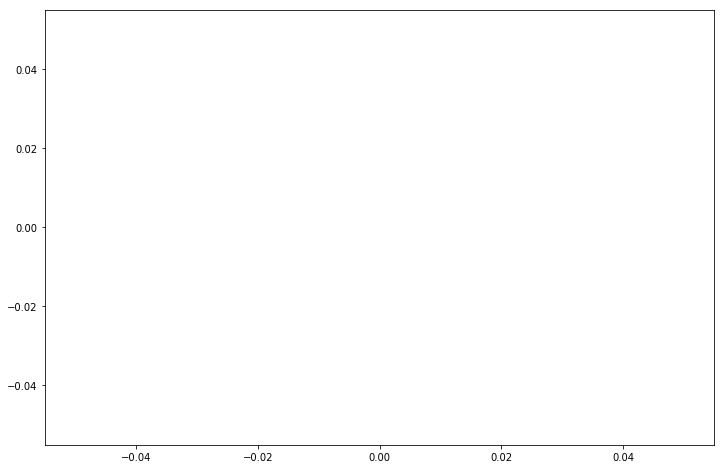

There is NaN data in column: NONLIVINGAPARTMENTS_MEDI


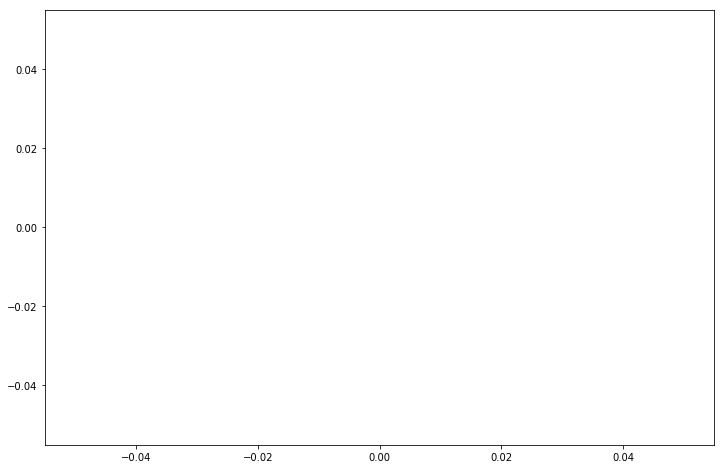

There is NaN data in column: NONLIVINGAREA_MEDI


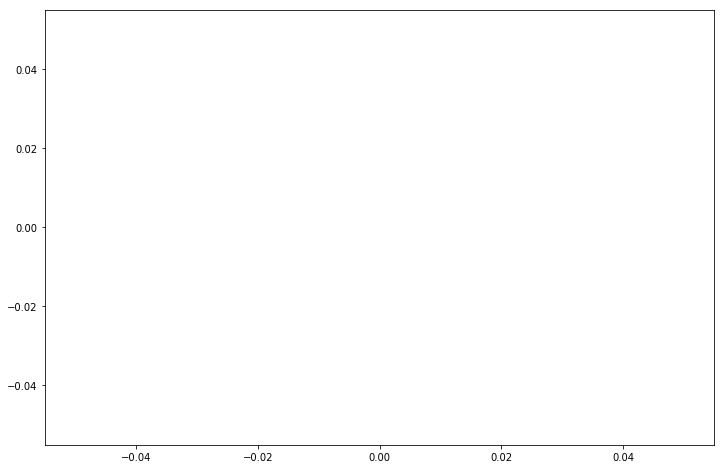

There is NaN data in column: TOTALAREA_MODE


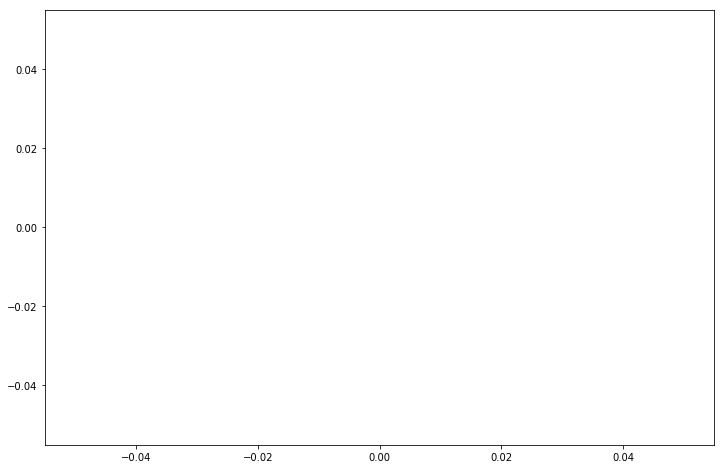

There is NaN data in column: OBS_30_CNT_SOCIAL_CIRCLE


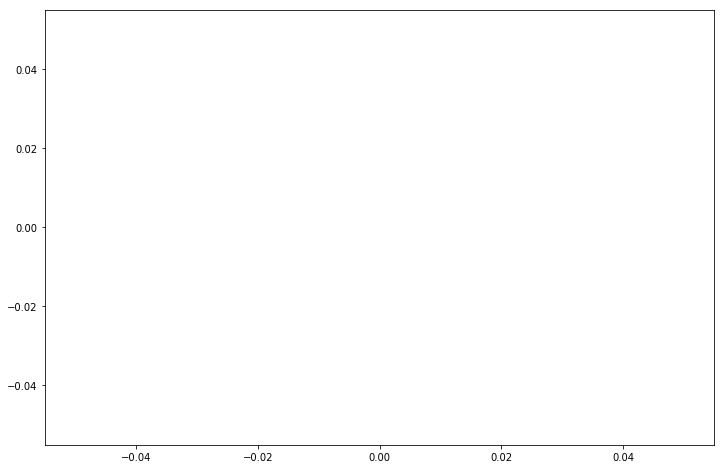

There is NaN data in column: DEF_30_CNT_SOCIAL_CIRCLE


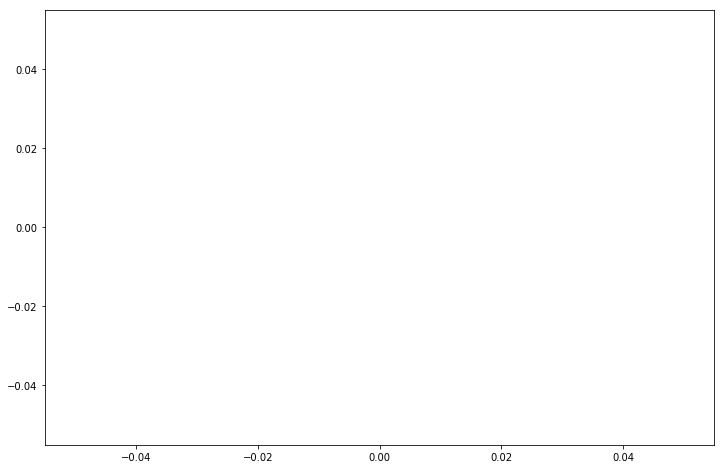

There is NaN data in column: OBS_60_CNT_SOCIAL_CIRCLE


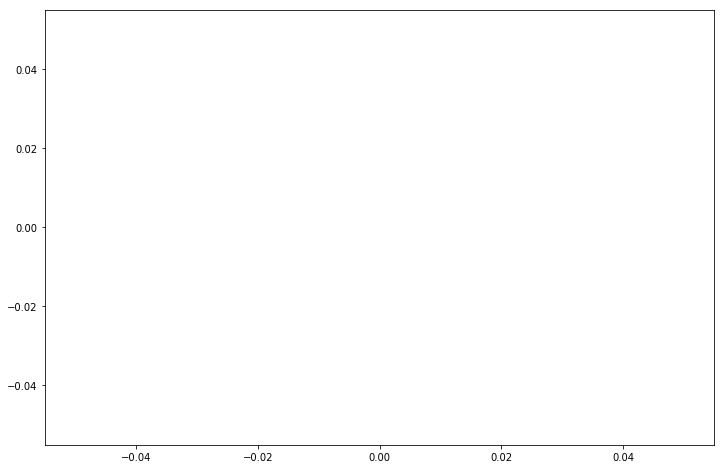

There is NaN data in column: DEF_60_CNT_SOCIAL_CIRCLE


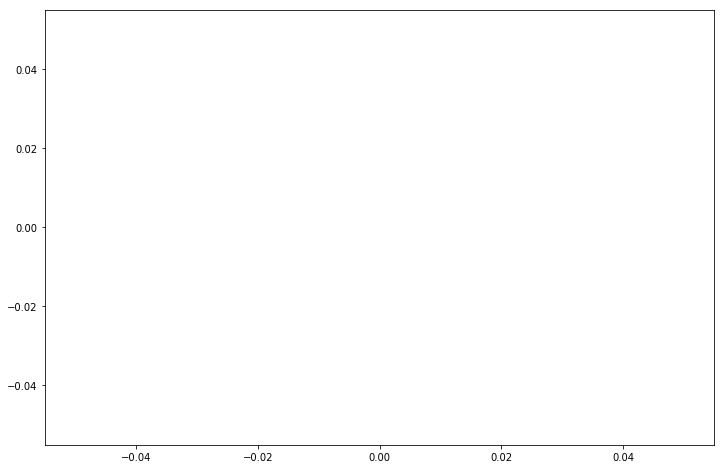

There is NaN data in column: DAYS_LAST_PHONE_CHANGE


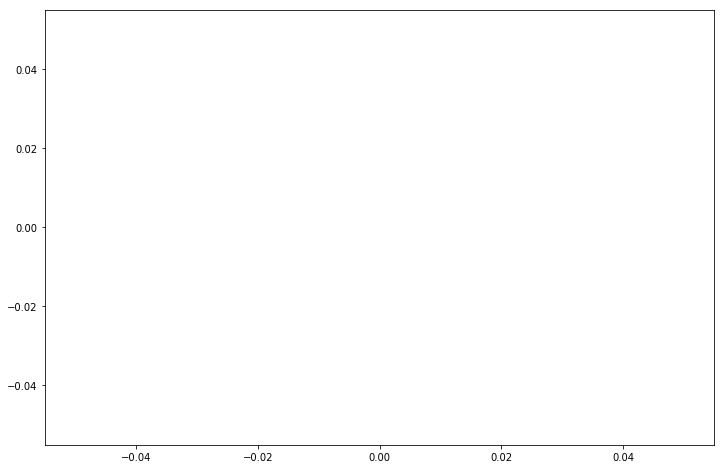

There is NaN data in column: AMT_REQ_CREDIT_BUREAU_HOUR


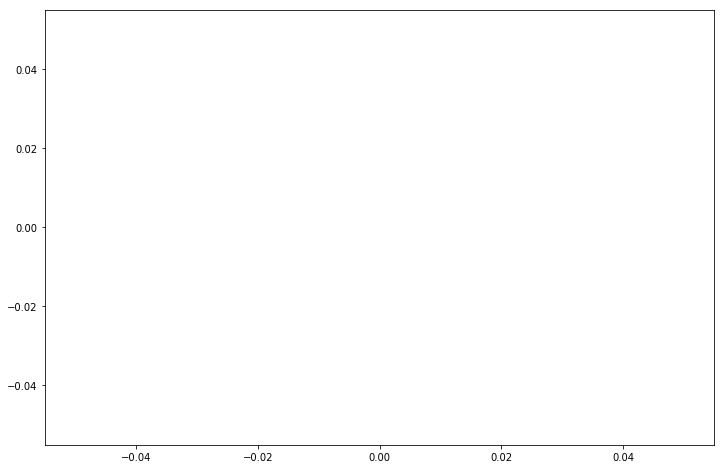

There is NaN data in column: AMT_REQ_CREDIT_BUREAU_DAY


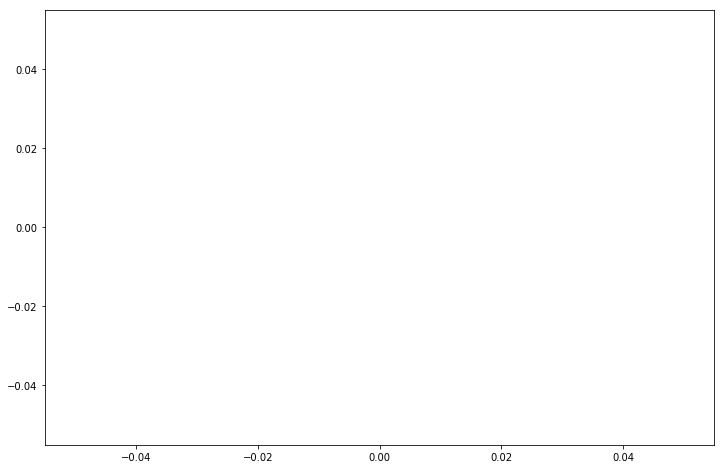

There is NaN data in column: AMT_REQ_CREDIT_BUREAU_WEEK


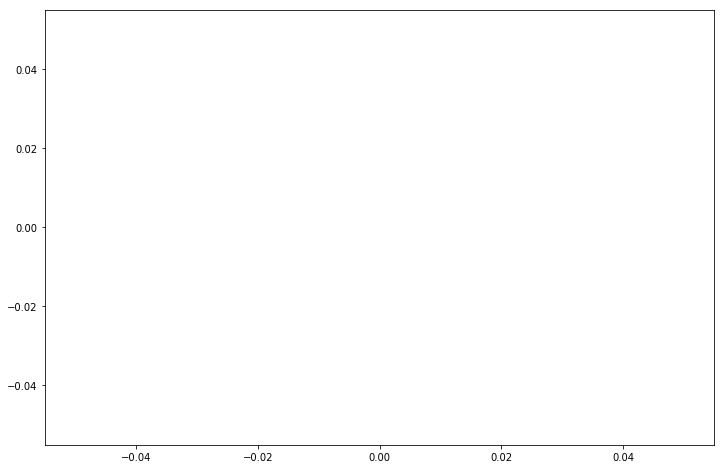

There is NaN data in column: AMT_REQ_CREDIT_BUREAU_MON


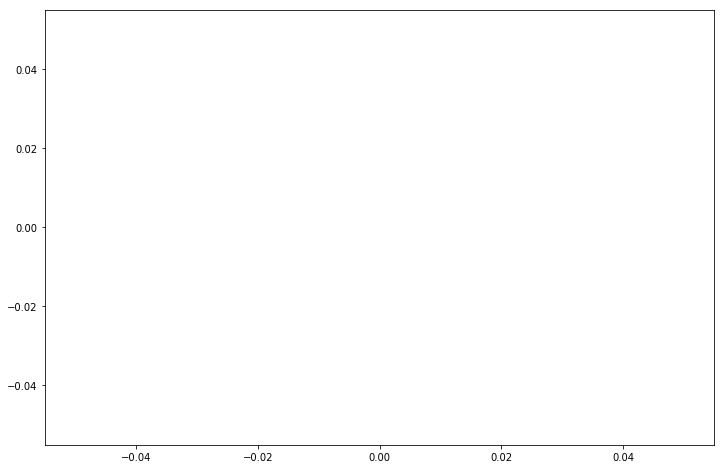

There is NaN data in column: AMT_REQ_CREDIT_BUREAU_QRT


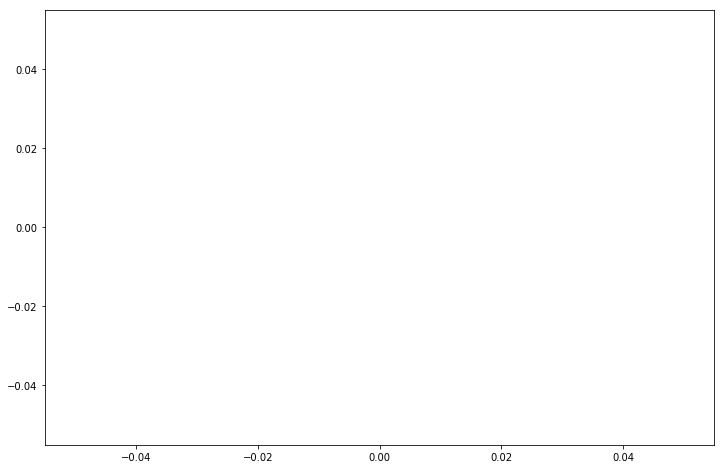

There is NaN data in column: AMT_REQ_CREDIT_BUREAU_YEAR


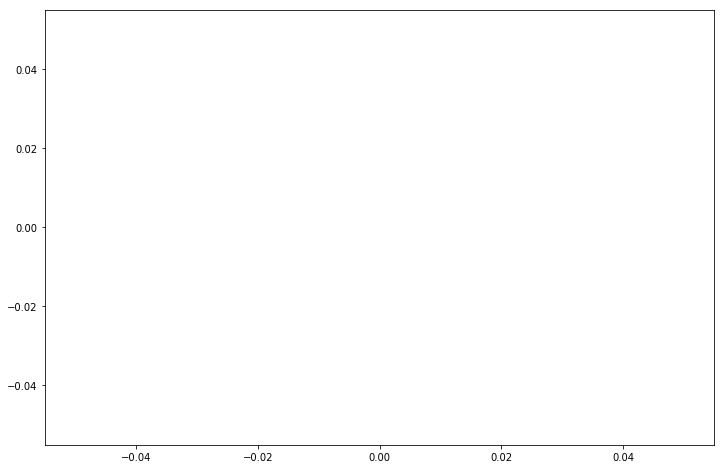

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in data.columns:
    if(data[column].dtypes=='float'):
        try:
            plt.figure(figsize=(12,8))
            type(data[column])
            sns.distplot(data[column], bins=50, kde=False)
            plt.show()
        except:
            print('There is NaN data in column: %s' %column)
            plt.show()